<a href="https://colab.research.google.com/github/devanshmalhotra1002/Hospital-LOS-and-Mortality/blob/main/LengthOfStay%26MortalityRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imported all the mandatory libraries to be used in the project
import zipfile
from google.colab import files
import os
import glob
# For Pre-processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
# For Training
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
# For Model Evaluation
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Imported the MIMIC3 zip file from the drive [Medical Information Mart for Intensive Care]
!wget -O /content/main.zip 'https://drive.google.com/u/0/uc?id=1CkS6xunbKtDdOVqo34IG3t0VOhxsEnX8&export=download'

--2022-07-12 10:28:22--  https://drive.google.com/u/0/uc?id=1CkS6xunbKtDdOVqo34IG3t0VOhxsEnX8&export=download
Resolving drive.google.com (drive.google.com)... 172.253.63.138, 172.253.63.100, 172.253.63.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.138|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1CkS6xunbKtDdOVqo34IG3t0VOhxsEnX8&export=download [following]
--2022-07-12 10:28:22--  https://drive.google.com/uc?id=1CkS6xunbKtDdOVqo34IG3t0VOhxsEnX8&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-5s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/isphdn1ifj3tathpbf99ujqebbogaseu/1657621650000/14295938933421454590/*/1CkS6xunbKtDdOVqo34IG3t0VOhxsEnX8?e=download&uuid=018870c6-a832-4ee9-9906-77c72d60ba81 [following]
--2022-07-12 10:28:32--  https://doc-10-5s-docs.googleusercontent.co

In [ ]:
mortality = pd.read_csv ('/content/drive/MyDrive/mimic3c.csv')

In [ ]:
with zipfile.ZipFile("/content/main.zip","r") as zip_ref:
    zip_ref.extractall("/content/all_csv")

In [ ]:
# List of csv files 
extension = 'csv'
all_filenames = [i for i in glob.glob('/content/all_csv/mimic_data/*.{}'.format(extension))]
all_filenames

['/content/all_csv/mimic_data/HEMATROCRIT.csv',
 '/content/all_csv/mimic_data/DIAS_PRESS.csv',
 '/content/all_csv/mimic_data/CREATININE.csv',
 '/content/all_csv/mimic_data/PLATELET_COUNT.csv',
 '/content/all_csv/mimic_data/RESP_RATE.csv',
 '/content/all_csv/mimic_data/MECH_VENT_TIME.csv',
 '/content/all_csv/mimic_data/CVP.csv',
 '/content/all_csv/mimic_data/TOTAL_LOS.csv',
 '/content/all_csv/mimic_data/PROCEDURE_COUTNS.csv',
 '/content/all_csv/mimic_data/BLOOD_UREA_NITROGEN.csv',
 '/content/all_csv/mimic_data/WHITE_BLOOD_CELLS.csv',
 '/content/all_csv/mimic_data/HR.csv',
 '/content/all_csv/mimic_data/ART_PH.csv',
 '/content/all_csv/mimic_data/BICARBONATE.csv',
 '/content/all_csv/mimic_data/SYS_PRESS.csv',
 '/content/all_csv/mimic_data/PREVIOUS_ADMISSION_COUNT.csv',
 '/content/all_csv/mimic_data/SURGERY_FLAGS.csv',
 '/content/all_csv/mimic_data/POTASSSIUM.csv',
 '/content/all_csv/mimic_data/SEVERITY_SCORES.csv',
 '/content/all_csv/mimic_data/SODIUM.csv',
 '/content/all_csv/mimic_data/SP

In [ ]:
# Imported csv files and merged them all as one based on the hospital admission count
merged = pd.read_csv(all_filenames[0], sep="\t",index_col=[0])
for i in range(1, len(all_filenames)):
  print(all_filenames[i])
  varDf = pd.read_csv(all_filenames[i], sep="\t",index_col=[0])
  merged = merged.merge(varDf, left_on='hadm_id', right_on='hadm_id')

/content/all_csv/mimic_data/DIAS_PRESS.csv
/content/all_csv/mimic_data/CREATININE.csv
/content/all_csv/mimic_data/PLATELET_COUNT.csv
/content/all_csv/mimic_data/RESP_RATE.csv
/content/all_csv/mimic_data/MECH_VENT_TIME.csv
/content/all_csv/mimic_data/CVP.csv
/content/all_csv/mimic_data/TOTAL_LOS.csv
/content/all_csv/mimic_data/PROCEDURE_COUTNS.csv
/content/all_csv/mimic_data/BLOOD_UREA_NITROGEN.csv
/content/all_csv/mimic_data/WHITE_BLOOD_CELLS.csv
/content/all_csv/mimic_data/HR.csv
/content/all_csv/mimic_data/ART_PH.csv
/content/all_csv/mimic_data/BICARBONATE.csv
/content/all_csv/mimic_data/SYS_PRESS.csv
/content/all_csv/mimic_data/PREVIOUS_ADMISSION_COUNT.csv
/content/all_csv/mimic_data/SURGERY_FLAGS.csv
/content/all_csv/mimic_data/POTASSSIUM.csv
/content/all_csv/mimic_data/SEVERITY_SCORES.csv
/content/all_csv/mimic_data/SODIUM.csv
/content/all_csv/mimic_data/SPO2.csv
/content/all_csv/mimic_data/TEMP.csv
/content/all_csv/mimic_data/ICD9_DIAG.csv
/content/all_csv/mimic_data/BLOOD_GLUCOS

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
print('Number of cases : ',merged.shape[0])
print('Number of features : ',merged.shape[1])

Number of cases :  18409
Number of features :  54


In [ ]:
def orderedlist(X):
    List = sorted(X.columns)
    for i in range(len(List)):
        print(i+1,List[i])

orderedlist(merged)

1 SURGERY_FLAG
2 admissions_count
3 age
4 avg_albumin
5 avg_art_ph
6 avg_bicarbonate
7 avg_blood_glucose
8 avg_blood_urea_nitrogen
9 avg_creatinine
10 avg_cvp
11 avg_dias_press
12 avg_hematrocrit
13 avg_hr
14 avg_platelet_count
15 avg_potasssium
16 avg_resp_rate
17 avg_sodium
18 avg_spo2
19 avg_sys_press
20 avg_temp
21 avg_white_blood_cells
22 ethnicity
23 gender
24 hadm_id
25 icd9_group
26 los
27 marital_status
28 oasis_avg
29 procedure_count
30 religion
31 saps_avg
32 service
33 sofa_avg
34 std_albumin
35 std_art_ph
36 std_bicarbonate
37 std_blood_glucose
38 std_blood_urea_nitrogen
39 std_creatinine
40 std_cvp
41 std_dias_press
42 std_hematrocrit
43 std_hr
44 std_platelet_count
45 std_potasssium
46 std_resp_rate
47 std_sodium
48 std_spo2
49 std_sys_press
50 std_temp
51 std_white_blood_cells
52 subject_id
53 total_los_days
54 total_mech_vent_time


In [ ]:
# All features to lowercase
def lowercaseHeaders(X):
    X.columns = [column.lower() for column in X.columns]
lowercaseHeaders(merged)

In [ ]:
# Renamed flawed feature names
merged = merged.rename(columns={'std_hematrocrit':'std_hematocrit',
                                'avg_hematrocrit':'avg_hematocrit',
                                'avg_potasssium':'avg_potassium',
                                'std_potasssium':'std_potassium'})

In [ ]:
# Dropped unnecessary features
merged = merged.drop(columns=['subject_id','hadm_id'])

In [ ]:
# Method to change first letter of all words in uppercase in a column
def titleData(X):
    for i in range(len(X)):
        if isinstance(X[i],str):
            X[i] = X[i].title()
        else:
            continue

In [ ]:
# Method to change first letter to uppercase and rest to lowercase in a column
def capitalizeData(X):
    for i in range(len(X)):
        X[i] = X[i].capitalize()

In [ ]:
merged.dtypes

avg_hematocrit             float64
std_hematocrit             float64
avg_dias_press             float64
std_dias_press             float64
avg_creatinine             float64
std_creatinine             float64
avg_platelet_count         float64
std_platelet_count         float64
avg_resp_rate              float64
std_resp_rate              float64
total_mech_vent_time       float64
avg_cvp                    float64
std_cvp                    float64
total_los_days             float64
procedure_count              int64
avg_blood_urea_nitrogen    float64
std_blood_urea_nitrogen    float64
avg_white_blood_cells      float64
std_white_blood_cells      float64
avg_hr                     float64
std_hr                     float64
avg_art_ph                 float64
std_art_ph                 float64
avg_bicarbonate            float64
std_bicarbonate            float64
avg_sys_press              float64
std_sys_press              float64
admissions_count             int64
surgery_flag        

In [ ]:
merged.head()

,avg_hematocrit,std_hematocrit,avg_dias_press,std_dias_press,avg_creatinine,std_creatinine,avg_platelet_count,std_platelet_count,avg_resp_rate,std_resp_rate,total_mech_vent_time,avg_cvp,std_cvp,total_los_days,procedure_count,avg_blood_urea_nitrogen,std_blood_urea_nitrogen,avg_white_blood_cells,std_white_blood_cells,avg_hr,std_hr,avg_art_ph,std_art_ph,avg_bicarbonate,std_bicarbonate,avg_sys_press,std_sys_press,admissions_count,surgery_flag,avg_potassium,std_potassium,oasis_avg,sofa_avg,saps_avg,avg_sodium,std_sodium,avg_spo2,std_spo2,avg_temp,std_temp,icd9_group,avg_blood_glucose,std_blood_glucose,avg_albumin,std_albumin,service,los,age,gender,marital_status,religion,ethnicity
0,31.853846,2.733318,82.169811,12.498740,0.638462,0.076795,228.615385,35.998932,18.647059,3.330873,2.00,NaN,NaN,12.061806,2,17.076923,3.226493,9.700000,2.840188,108.630252,9.944648,7.38,0.036515,29.384615,3.990373,140.509434,12.972678,1,NO SURGERY,4.076923,0.297640,23.0,0.0,10.0,131.384615,1.980676,97.861789,2.564976,NaN,NaN,diseases of the respiratory system,105.000000,33.578267,2.00,NaN,OMED,4.9776,48.949751,F,SINGLE,NONE,BLACK
1,35.914286,3.575112,51.175439,6.118248,0.783333,0.040825,142.571429,28.814679,23.515625,6.409299,4.75,9.526316,5.956961,4.903472,4,17.000000,3.633180,12.385714,2.927131,68.968750,12.208465,NaN,NaN,25.200000,1.923538,110.543860,12.652033,1,NARROW,4.242857,0.222539,31.0,5.0,17.0,137.714286,3.039424,96.174603,2.028345,NaN,NaN,diseases of the circulatory system,152.235294,42.697379,4.30,NaN,CSURG,2.4908,60.837435,M,MARRIED,CHRISTIAN,WHITE
2,27.562963,5.553665,69.479866,12.061344,0.817647,0.272110,518.058824,419.045115,21.256849,6.281412,214.00,NaN,NaN,14.397917,15,11.764706,2.107410,11.829412,3.451044,95.351536,12.149580,NaN,NaN,27.187500,2.286737,143.305369,16.706338,1,NARROW,4.084615,0.473871,31.0,2.0,21.0,138.037037,1.911131,99.094915,1.978922,NaN,NaN,injury and poisoning,132.458333,19.834049,2.45,0.070711,TRAUM,11.5029,21.518362,M,SINGLE,NONE,HISPANIC
3,28.486667,4.719695,56.357895,9.841203,0.845455,0.129334,198.384615,65.723586,14.426966,3.893140,6.90,10.111111,4.850789,10.112500,4,12.909091,1.868397,8.930769,2.450301,80.516484,8.053105,NaN,NaN,26.555556,3.778595,115.642105,14.140568,1,NARROW,4.185714,0.382013,41.0,4.0,23.0,132.928571,2.164905,98.096774,3.297115,NaN,NaN,diseases of the circulatory system,111.166667,14.288004,3.85,0.353553,SURG,3.5763,67.757511,M,MARRIED,CHRISTIAN,WHITE
4,30.714286,2.204109,71.573427,12.049481,1.112500,0.064087,160.000000,16.248077,15.270270,4.734581,89.00,NaN,NaN,6.173611,5,42.000000,9.055385,10.485714,1.345893,86.871622,10.507063,NaN,NaN,24.000000,1.069045,113.839161,14.247634,1,NARROW,4.287500,0.442194,39.0,5.0,16.0,134.750000,2.187628,98.871622,1.526547,NaN,NaN,diseases of the respiratory system,81.750000,14.829989,1.60,NaN,MED,6.1731,55.549441,M,SINGLE,CHRISTIAN,WHITE


### **Analyzed Categorical Features**

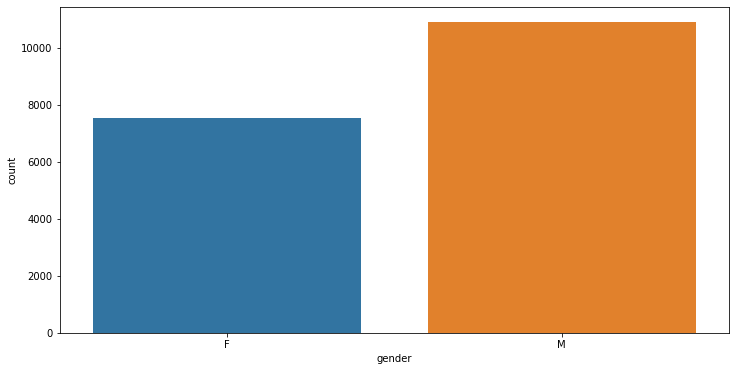

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='gender',data=merged)

In [ ]:
capitalizeData(merged.marital_status)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


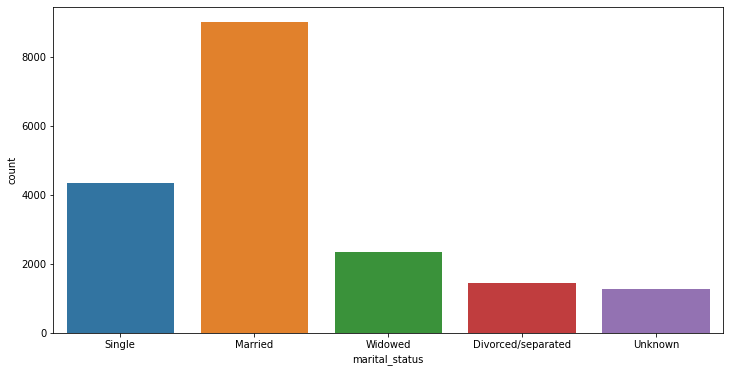

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='marital_status',data=merged)

In [ ]:
capitalizeData(merged.religion)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


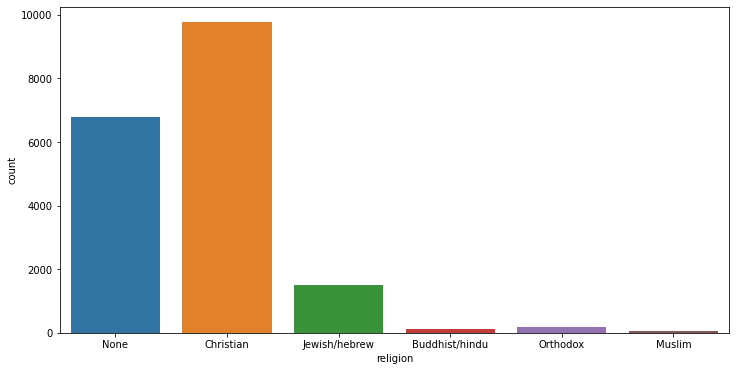

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='religion',data=merged)

In [ ]:
capitalizeData(merged.ethnicity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


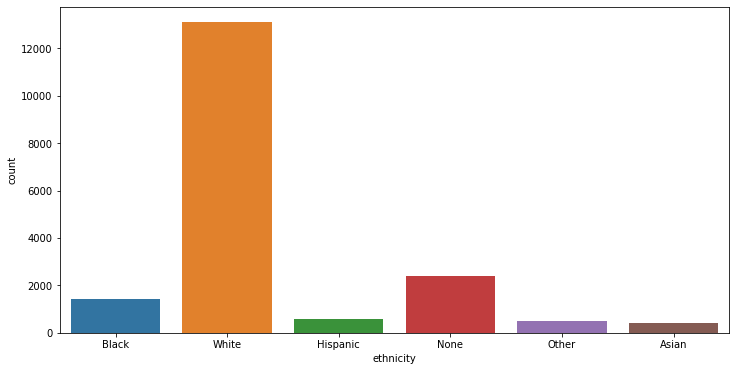

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='ethnicity',data=merged)

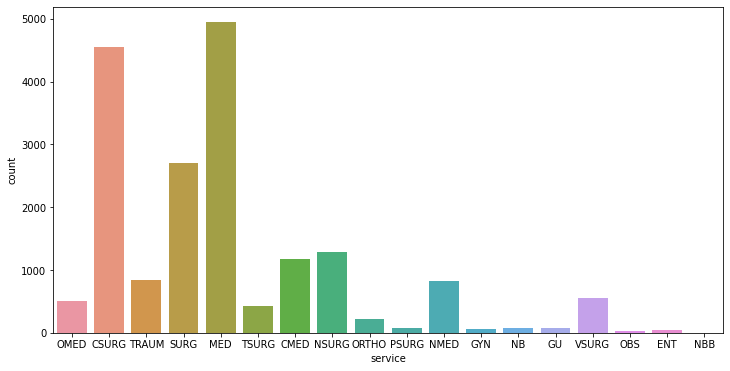

In [ ]:
# Type of service given to patient
plt.figure(figsize=(12,6))
sns.countplot(x='service',data=merged)

In [ ]:
# Diagnosis List
def distinctvalues(X):
    List = [i for i in X.unique()]
    for i in range(len(List)):
        print(i+1,List[i])
distinctvalues(merged.icd9_group)

1 diseases of the respiratory system
2 diseases of the circulatory system
3 injury and poisoning
4 symptoms, signs, and ill-defined conditions
5 infectious and parasitic diseases
6 diseases of the nervous system and sense organs
7 neoplasms
8 diseases of the digestive system
9 complications of pregnancy, childbirth, and the puerperium
10 diseases of the musculoskeletal system and connective tissue
11 diseases of the genitourinary system
12 supplementary classification of factors influencing health status
13 diseases of the skin and subcutaneous tissue
14 mental disorders
15 congenital anomalies
16 endocrine, nutritional and metabolic diseases, and immunity disorders
17 certain conditions originating in the perinatal period
18 nan
19 diseases of the blood and blood-forming organs


In [ ]:
titleData(merged.icd9_group)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


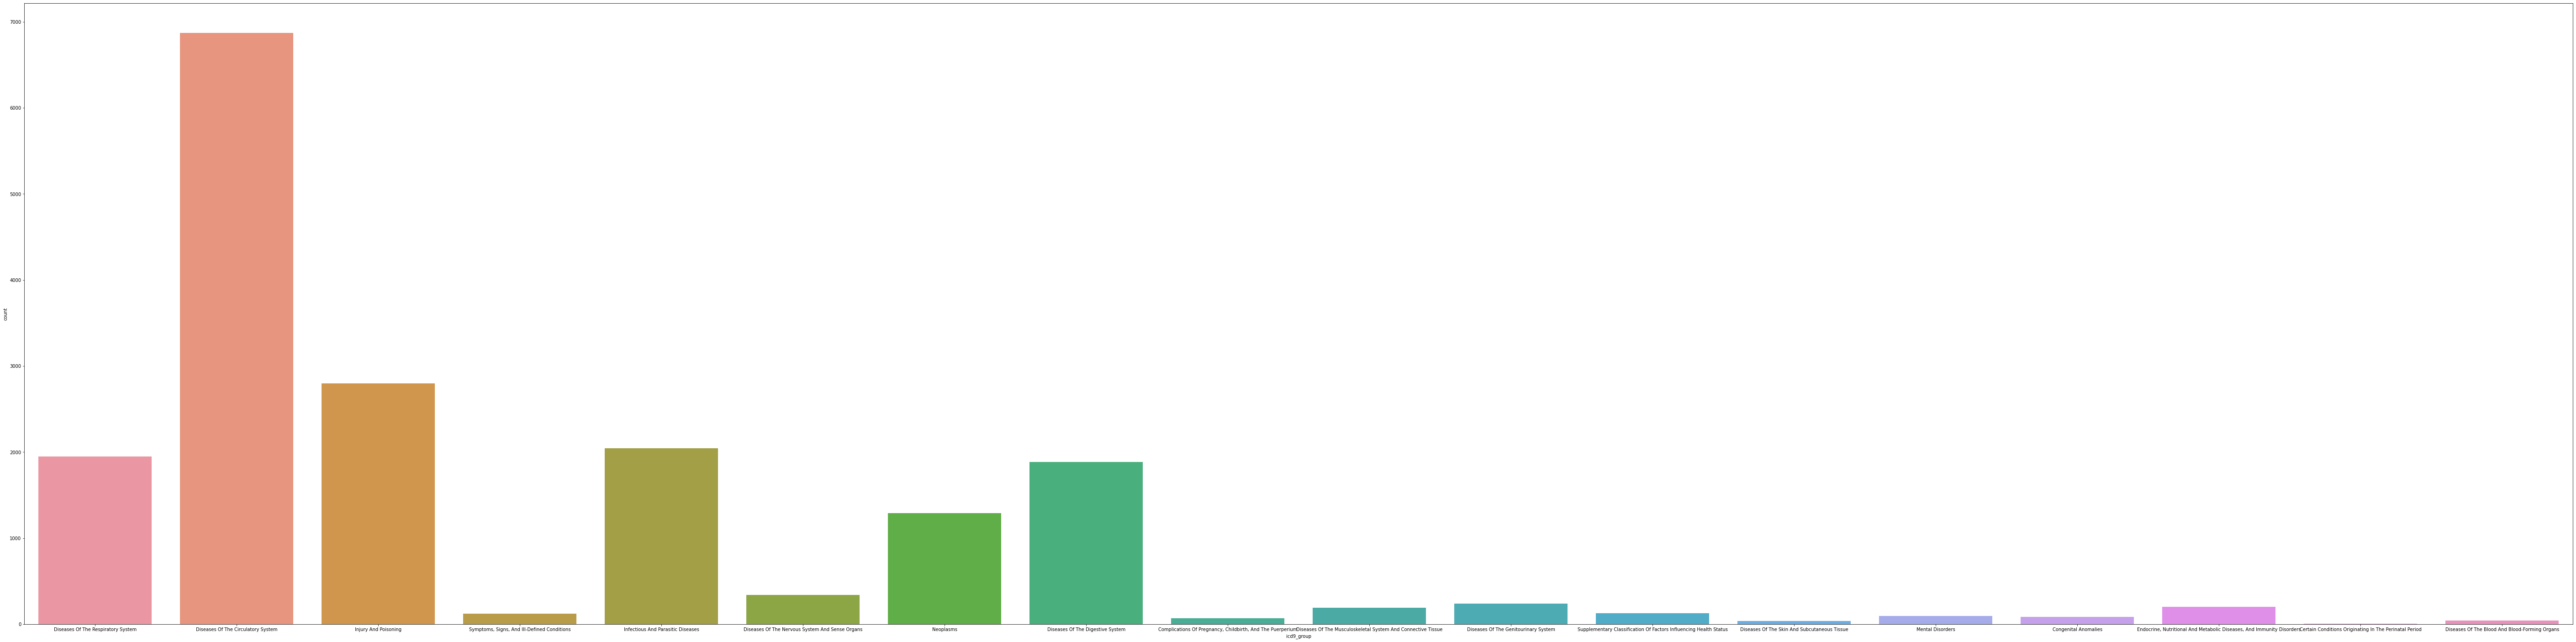

In [ ]:
# ICD9 category names
plt.figure(figsize=(100,25))
sns.countplot(x='icd9_group',data=merged)

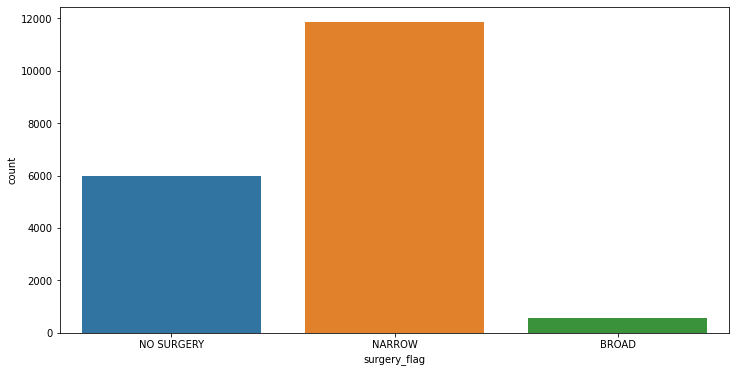

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='surgery_flag',data=merged)

### **Analyzed Quantitative Features**

In [ ]:
merged.head()

,avg_hematocrit,std_hematocrit,avg_dias_press,std_dias_press,avg_creatinine,std_creatinine,avg_platelet_count,std_platelet_count,avg_resp_rate,std_resp_rate,total_mech_vent_time,avg_cvp,std_cvp,total_los_days,procedure_count,avg_blood_urea_nitrogen,std_blood_urea_nitrogen,avg_white_blood_cells,std_white_blood_cells,avg_hr,std_hr,avg_art_ph,std_art_ph,avg_bicarbonate,std_bicarbonate,avg_sys_press,std_sys_press,admissions_count,surgery_flag,avg_potassium,std_potassium,oasis_avg,sofa_avg,saps_avg,avg_sodium,std_sodium,avg_spo2,std_spo2,avg_temp,std_temp,icd9_group,avg_blood_glucose,std_blood_glucose,avg_albumin,std_albumin,service,los,age,gender,marital_status,religion,ethnicity
0,31.853846,2.733318,82.169811,12.498740,0.638462,0.076795,228.615385,35.998932,18.647059,3.330873,2.00,NaN,NaN,12.061806,2,17.076923,3.226493,9.700000,2.840188,108.630252,9.944648,7.38,0.036515,29.384615,3.990373,140.509434,12.972678,1,NO SURGERY,4.076923,0.297640,23.0,0.0,10.0,131.384615,1.980676,97.861789,2.564976,NaN,NaN,Diseases Of The Respiratory System,105.000000,33.578267,2.00,NaN,OMED,4.9776,48.949751,F,Single,None,Black
1,35.914286,3.575112,51.175439,6.118248,0.783333,0.040825,142.571429,28.814679,23.515625,6.409299,4.75,9.526316,5.956961,4.903472,4,17.000000,3.633180,12.385714,2.927131,68.968750,12.208465,NaN,NaN,25.200000,1.923538,110.543860,12.652033,1,NARROW,4.242857,0.222539,31.0,5.0,17.0,137.714286,3.039424,96.174603,2.028345,NaN,NaN,Diseases Of The Circulatory System,152.235294,42.697379,4.30,NaN,CSURG,2.4908,60.837435,M,Married,Christian,White
2,27.562963,5.553665,69.479866,12.061344,0.817647,0.272110,518.058824,419.045115,21.256849,6.281412,214.00,NaN,NaN,14.397917,15,11.764706,2.107410,11.829412,3.451044,95.351536,12.149580,NaN,NaN,27.187500,2.286737,143.305369,16.706338,1,NARROW,4.084615,0.473871,31.0,2.0,21.0,138.037037,1.911131,99.094915,1.978922,NaN,NaN,Injury And Poisoning,132.458333,19.834049,2.45,0.070711,TRAUM,11.5029,21.518362,M,Single,None,Hispanic
3,28.486667,4.719695,56.357895,9.841203,0.845455,0.129334,198.384615,65.723586,14.426966,3.893140,6.90,10.111111,4.850789,10.112500,4,12.909091,1.868397,8.930769,2.450301,80.516484,8.053105,NaN,NaN,26.555556,3.778595,115.642105,14.140568,1,NARROW,4.185714,0.382013,41.0,4.0,23.0,132.928571,2.164905,98.096774,3.297115,NaN,NaN,Diseases Of The Circulatory System,111.166667,14.288004,3.85,0.353553,SURG,3.5763,67.757511,M,Married,Christian,White
4,30.714286,2.204109,71.573427,12.049481,1.112500,0.064087,160.000000,16.248077,15.270270,4.734581,89.00,NaN,NaN,6.173611,5,42.000000,9.055385,10.485714,1.345893,86.871622,10.507063,NaN,NaN,24.000000,1.069045,113.839161,14.247634,1,NARROW,4.287500,0.442194,39.0,5.0,16.0,134.750000,2.187628,98.871622,1.526547,NaN,NaN,Diseases Of The Respiratory System,81.750000,14.829989,1.60,NaN,MED,6.1731,55.549441,M,Single,Christian,White


In [ ]:
merged.age = merged.age.astype('int')

In [ ]:
# Dropped Features
# merged = merged.drop(columns=['los','admissions_count'])

In [ ]:
# Used features with average data rather than standardised data
for column in merged.columns:
   if column[0:3] == 'std':
       print('Dropped',column)
       merged = merged.drop(columns=[column])

Dropped std_hematocrit
Dropped std_dias_press
Dropped std_creatinine
Dropped std_platelet_count
Dropped std_resp_rate
Dropped std_cvp
Dropped std_blood_urea_nitrogen
Dropped std_white_blood_cells
Dropped std_hr
Dropped std_art_ph
Dropped std_bicarbonate
Dropped std_sys_press
Dropped std_potassium
Dropped std_sodium
Dropped std_spo2
Dropped std_temp
Dropped std_blood_glucose
Dropped std_albumin


In [ ]:
merged.columns = merged.columns.str.replace('avg_','')

In [ ]:
merged.head()

,hematocrit,dias_press,creatinine,platelet_count,resp_rate,total_mech_vent_time,cvp,total_los_days,procedure_count,blood_urea_nitrogen,white_blood_cells,hr,art_ph,bicarbonate,sys_press,admissions_count,surgery_flag,potassium,oasis_avg,sofa_avg,saps_avg,sodium,spo2,temp,icd9_group,blood_glucose,albumin,service,los,age,gender,marital_status,religion,ethnicity
0,31.853846,82.169811,0.638462,228.615385,18.647059,2.00,NaN,12.061806,2,17.076923,9.700000,108.630252,7.38,29.384615,140.509434,1,NO SURGERY,4.076923,23.0,0.0,10.0,131.384615,97.861789,NaN,Diseases Of The Respiratory System,105.000000,2.00,OMED,4.9776,48,F,Single,None,Black
1,35.914286,51.175439,0.783333,142.571429,23.515625,4.75,9.526316,4.903472,4,17.000000,12.385714,68.968750,NaN,25.200000,110.543860,1,NARROW,4.242857,31.0,5.0,17.0,137.714286,96.174603,NaN,Diseases Of The Circulatory System,152.235294,4.30,CSURG,2.4908,60,M,Married,Christian,White
2,27.562963,69.479866,0.817647,518.058824,21.256849,214.00,NaN,14.397917,15,11.764706,11.829412,95.351536,NaN,27.187500,143.305369,1,NARROW,4.084615,31.0,2.0,21.0,138.037037,99.094915,NaN,Injury And Poisoning,132.458333,2.45,TRAUM,11.5029,21,M,Single,None,Hispanic
3,28.486667,56.357895,0.845455,198.384615,14.426966,6.90,10.111111,10.112500,4,12.909091,8.930769,80.516484,NaN,26.555556,115.642105,1,NARROW,4.185714,41.0,4.0,23.0,132.928571,98.096774,NaN,Diseases Of The Circulatory System,111.166667,3.85,SURG,3.5763,67,M,Married,Christian,White
4,30.714286,71.573427,1.112500,160.000000,15.270270,89.00,NaN,6.173611,5,42.000000,10.485714,86.871622,NaN,24.000000,113.839161,1,NARROW,4.287500,39.0,5.0,16.0,134.750000,98.871622,NaN,Diseases Of The Respiratory System,81.750000,1.60,MED,6.1731,55,M,Single,Christian,White


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18409 entries, 0 to 18408
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hematocrit            18409 non-null  float64
 1   dias_press            18328 non-null  float64
 2   creatinine            18409 non-null  float64
 3   platelet_count        18409 non-null  float64
 4   resp_rate             18403 non-null  float64
 5   total_mech_vent_time  18409 non-null  float64
 6   cvp                   12403 non-null  float64
 7   total_los_days        18409 non-null  float64
 8   procedure_count       18409 non-null  int64  
 9   blood_urea_nitrogen   18409 non-null  float64
 10  white_blood_cells     18409 non-null  float64
 11  hr                    18408 non-null  float64
 12  art_ph                9914 non-null   float64
 13  bicarbonate           18408 non-null  float64
 14  sys_press             18328 non-null  float64
 15  admissions_count   

In [ ]:
# Very high percentage of values missing
merged = merged.drop(columns=['art_ph','temp','cvp'])

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18409 entries, 0 to 18408
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hematocrit            18409 non-null  float64
 1   dias_press            18328 non-null  float64
 2   creatinine            18409 non-null  float64
 3   platelet_count        18409 non-null  float64
 4   resp_rate             18403 non-null  float64
 5   total_mech_vent_time  18409 non-null  float64
 6   total_los_days        18409 non-null  float64
 7   procedure_count       18409 non-null  int64  
 8   blood_urea_nitrogen   18409 non-null  float64
 9   white_blood_cells     18409 non-null  float64
 10  hr                    18408 non-null  float64
 11  bicarbonate           18408 non-null  float64
 12  sys_press             18328 non-null  float64
 13  admissions_count      18409 non-null  int64  
 14  surgery_flag          18409 non-null  object 
 15  potassium          

In [ ]:
correlation = merged.corr()
correlation.los

hematocrit             -0.118915
dias_press             -0.000289
creatinine              0.006650
platelet_count          0.108437
resp_rate               0.009200
total_mech_vent_time    0.810864
total_los_days          0.520885
procedure_count         0.360641
blood_urea_nitrogen     0.160546
white_blood_cells       0.073929
hr                     -0.000049
bicarbonate             0.040692
sys_press               0.074210
admissions_count        0.002419
potassium              -0.010729
oasis_avg               0.053877
sofa_avg                0.118370
saps_avg                0.015744
sodium                  0.069710
spo2                   -0.003264
blood_glucose          -0.021592
albumin                -0.228318
los                     1.000000
age                    -0.112540
Name: los, dtype: float64

In [ ]:
merged.head()

,hematocrit,dias_press,creatinine,platelet_count,resp_rate,total_mech_vent_time,total_los_days,procedure_count,blood_urea_nitrogen,white_blood_cells,hr,bicarbonate,sys_press,admissions_count,surgery_flag,potassium,oasis_avg,sofa_avg,saps_avg,sodium,spo2,icd9_group,blood_glucose,albumin,service,los,age,gender,marital_status,religion,ethnicity
0,31.853846,82.169811,0.638462,228.615385,18.647059,2.00,12.061806,2,17.076923,9.700000,108.630252,29.384615,140.509434,1,NO SURGERY,4.076923,23.0,0.0,10.0,131.384615,97.861789,Diseases Of The Respiratory System,105.000000,2.00,OMED,4.9776,48,F,Single,None,Black
1,35.914286,51.175439,0.783333,142.571429,23.515625,4.75,4.903472,4,17.000000,12.385714,68.968750,25.200000,110.543860,1,NARROW,4.242857,31.0,5.0,17.0,137.714286,96.174603,Diseases Of The Circulatory System,152.235294,4.30,CSURG,2.4908,60,M,Married,Christian,White
2,27.562963,69.479866,0.817647,518.058824,21.256849,214.00,14.397917,15,11.764706,11.829412,95.351536,27.187500,143.305369,1,NARROW,4.084615,31.0,2.0,21.0,138.037037,99.094915,Injury And Poisoning,132.458333,2.45,TRAUM,11.5029,21,M,Single,None,Hispanic
3,28.486667,56.357895,0.845455,198.384615,14.426966,6.90,10.112500,4,12.909091,8.930769,80.516484,26.555556,115.642105,1,NARROW,4.185714,41.0,4.0,23.0,132.928571,98.096774,Diseases Of The Circulatory System,111.166667,3.85,SURG,3.5763,67,M,Married,Christian,White
4,30.714286,71.573427,1.112500,160.000000,15.270270,89.00,6.173611,5,42.000000,10.485714,86.871622,24.000000,113.839161,1,NARROW,4.287500,39.0,5.0,16.0,134.750000,98.871622,Diseases Of The Respiratory System,81.750000,1.60,MED,6.1731,55,M,Single,Christian,White


In [ ]:
merged = merged.rename(columns = {'los':'length_of_stay'})

**Missing Value Imputation & Outlier Treatment**

In [ ]:
# Potassium

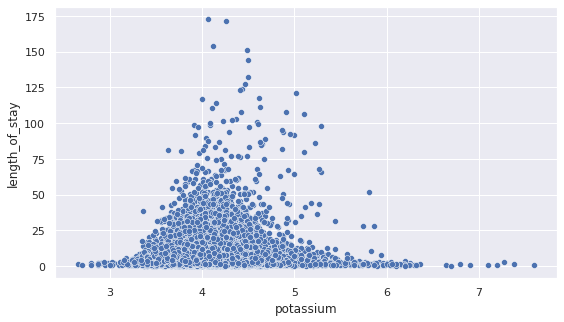

In [ ]:
# Normal Potassium level in blood is 3.6 to 5.2 units
sns.set(rc = {'figure.figsize':(9,5)})
sns.scatterplot(x='potassium',y='length_of_stay',data=merged)

In [ ]:
# Hematocrit

In [ ]:
# Hematocrit is the percentage of red blood cells in the blood 

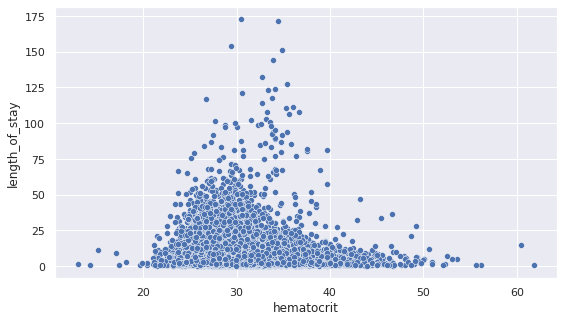

In [ ]:
# Normal range of hematocrit for men is 41% to 50% and women is 36% to 48%
sns.scatterplot(x='hematocrit',y='length_of_stay',data=merged)

In [ ]:
# White Blood Cells

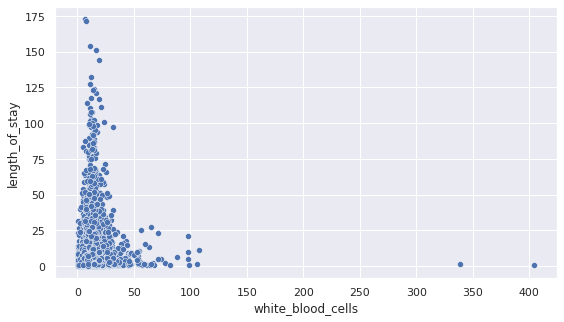

In [ ]:
# Normal range of WBCs in the blood is 4.5 to 11
sns.scatterplot(x='white_blood_cells',y='length_of_stay',data=merged)

In [ ]:
# Very high WBC counts over 100 generally occur with conditions like leukemia or other types of blood and bone marrow cancer
merged[merged['white_blood_cells']>150]

,hematocrit,dias_press,creatinine,platelet_count,resp_rate,total_mech_vent_time,total_los_days,procedure_count,blood_urea_nitrogen,white_blood_cells,hr,bicarbonate,sys_press,admissions_count,surgery_flag,potassium,oasis_avg,sofa_avg,saps_avg,sodium,spo2,icd9_group,blood_glucose,albumin,service,length_of_stay,age,gender,marital_status,religion,ethnicity
1901,28.00,56.0,2.166667,36.0,29.60000,18.000000,1.059722,7,45.666667,339.0,104.566667,18.333333,88.466667,1,NO SURGERY,4.333333,68.0,18.0,40.0,138.0,92.555556,Infectious And Parasitic Diseases,196.333333,2.4,MED,1.1082,69,M,Widowed,None,White
9955,32.15,66.0,2.400000,105.0,17.52381,8.583333,0.585417,2,49.000000,404.2,87.000000,26.500000,113.714286,1,NO SURGERY,3.650000,46.0,13.0,31.0,141.0,86.571429,Diseases Of The Respiratory System,208.500000,2.8,MED,0.7368,84,M,Married,None,None


In [ ]:
upperlimit = round(np.percentile(merged.white_blood_cells,99.99),6)
print("Upperlimit : "+str(upperlimit))
print("Number of cases above Upperlimit [Outliers] : "+str(merged[merged.white_blood_cells>upperlimit].shape[0]))

Upperlimit : 144.504943
Number of cases above Upperlimit [Outliers] : 2


In [ ]:
merged.white_blood_cells[merged.white_blood_cells>upperlimit] = upperlimit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


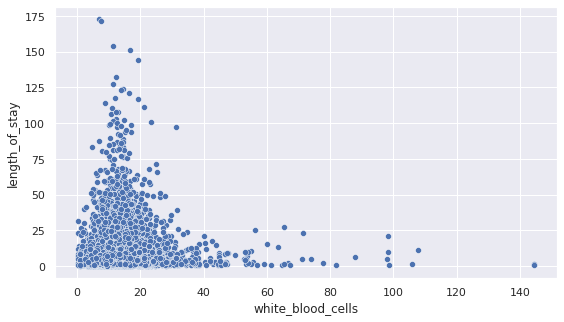

In [ ]:
sns.scatterplot(x='white_blood_cells',y='length_of_stay',data=merged)

In [ ]:
# Glucose 

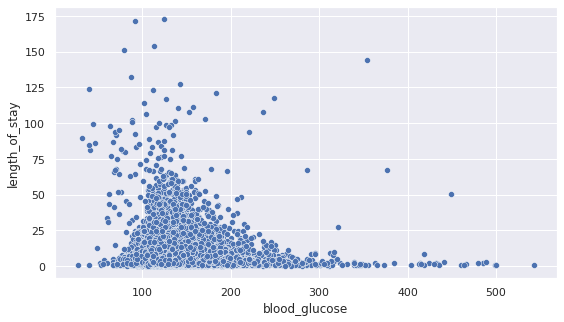

In [ ]:
# A blood sugar level less than 140 units is normal
sns.scatterplot(x='blood_glucose',y='length_of_stay',data=merged)

In [ ]:
# Ventilator Time

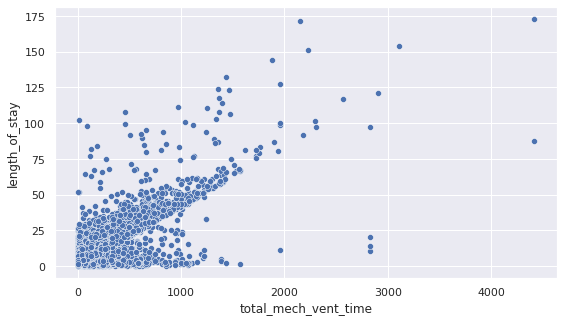

In [ ]:
sns.scatterplot(x='total_mech_vent_time',y='length_of_stay',data=merged)

In [ ]:
merged[merged['total_mech_vent_time']>4000]

,hematocrit,dias_press,creatinine,platelet_count,resp_rate,total_mech_vent_time,total_los_days,procedure_count,blood_urea_nitrogen,white_blood_cells,hr,bicarbonate,sys_press,admissions_count,surgery_flag,potassium,oasis_avg,sofa_avg,saps_avg,sodium,spo2,icd9_group,blood_glucose,albumin,service,length_of_stay,age,gender,marital_status,religion,ethnicity
12510,30.531609,57.553235,0.747863,125.817337,19.88387,4414.083333,294.660417,17,37.082857,6.969592,75.844437,30.691643,132.281501,1,NARROW,4.059453,30.0,7.0,20.5,140.923077,98.674654,Diseases Of The Digestive System,124.637795,2.7,SURG,87.6364,60,M,Divorced/separated,Christian,White
12511,30.531609,57.553235,0.747863,125.817337,19.88387,4414.083333,294.660417,17,37.082857,6.969592,75.844437,30.691643,132.281501,1,NARROW,4.059453,30.0,7.0,20.5,140.923077,98.674654,Diseases Of The Digestive System,124.637795,2.7,SURG,173.0725,60,M,Divorced/separated,Christian,White


In [ ]:
# Heart Rate

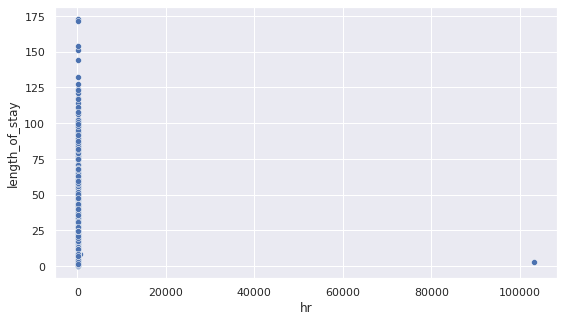

In [ ]:
sns.scatterplot(x='hr',y='length_of_stay',data=merged)

In [ ]:
sorted(merged.hr)[-10:]

[166.354632587859,
 167.038493038493,
 167.429752066116,
 168.180418982471,
 169.712814645309,
 169.854432337291,
 169.85534591195,
 172.106483036614,
 484.632558139535,
 103185.154639175]

In [ ]:
# Heart rate above 220 is not impossible 
merged.drop(merged.loc[merged['hr']>220].index, inplace=True)

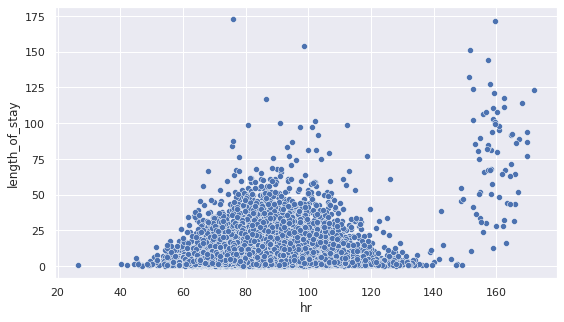

In [ ]:
sns.scatterplot(x='hr',y='length_of_stay',data=merged)

In [ ]:
# Missing values for heart rate filled with the mean
mean_hr = round(merged.hr[merged.hr<140].mean(),6)
print(mean_hr)
merged.hr = merged.hr.fillna(mean_hr)

87.013184


In [ ]:
# Rate of Respiration

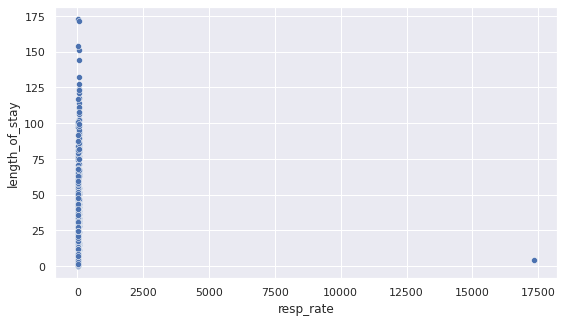

In [ ]:
sns.scatterplot(x='resp_rate',y='length_of_stay',data=merged)

In [ ]:
sorted(merged.resp_rate)[-5:]

[56.3825,
 56.9991063449508,
 57.5655526992288,
 60.0175763182239,
 17340.5220588235]

In [ ]:
merged.drop(merged.loc[merged['resp_rate']>100].index, inplace=True)

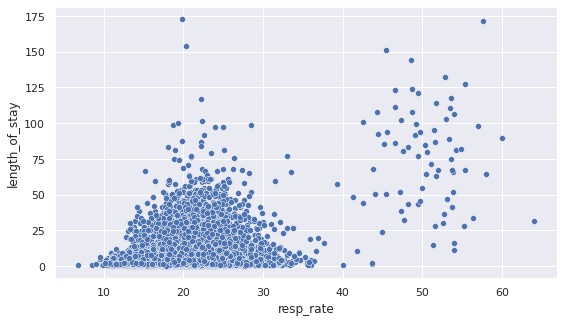

In [ ]:
sns.scatterplot(x='resp_rate',y='length_of_stay',data=merged)

In [ ]:
# Missing values for respiratory rate filled with the mean
mean_resp_rate = round(merged.resp_rate[merged.resp_rate<40].mean(),6)
print(mean_resp_rate)
merged.resp_rate = merged.resp_rate.fillna(mean_resp_rate)

19.584666


In [ ]:
# Blood Urea Nitrogen

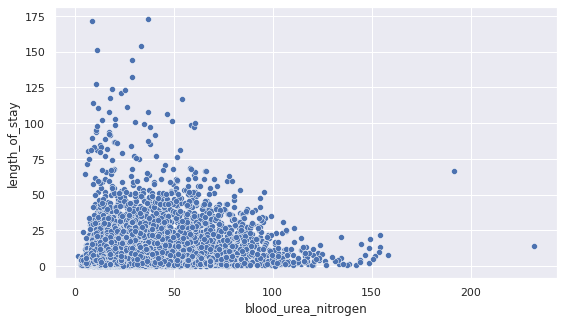

In [ ]:
# Range of normal blood urea nitrogen level is around 6 to 24 units
sns.scatterplot(x='blood_urea_nitrogen',y='length_of_stay',data=merged)

In [ ]:
mean_blood_urea_nitrogen = round(merged.blood_urea_nitrogen.mean(),6)
print(mean_blood_urea_nitrogen)
merged.blood_urea_nitrogen = merged.blood_urea_nitrogen.fillna(mean_blood_urea_nitrogen)

28.934058


In [ ]:
# Oxygen Saturation

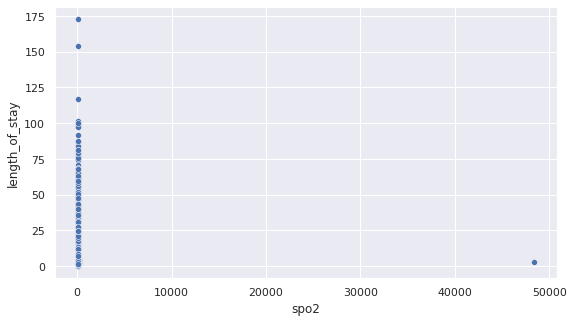

In [ ]:
sns.scatterplot(x='spo2',y='length_of_stay',data=merged)

In [ ]:
# SPO2 levels above 100% is not possible.
sorted(merged.spo2)[-10:]

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 111.193092621664,
 111.563088512241,
 136.413533834586,
 142.142857142857,
 144.873684210526]

In [ ]:
mean_spo2 = round(merged.spo2[merged.spo2<=100].mean(),6)
print(mean_spo2)
merged.spo2 = merged.spo2.fillna(mean_spo2)

97.086608


In [ ]:
# Dropped rows having spo2 level above 100
merged.drop(merged.loc[merged['spo2']>100].index, inplace=True)

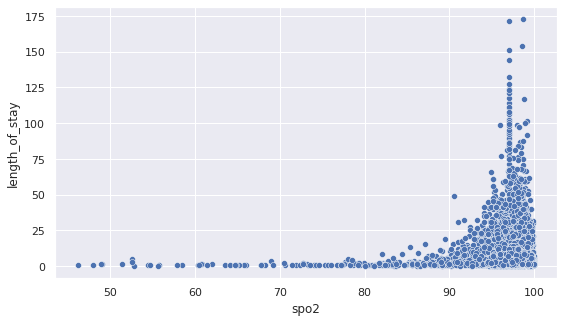

In [ ]:
sns.scatterplot(x='spo2',y='length_of_stay',data=merged)

In [ ]:
# Systolic Blood Pressure

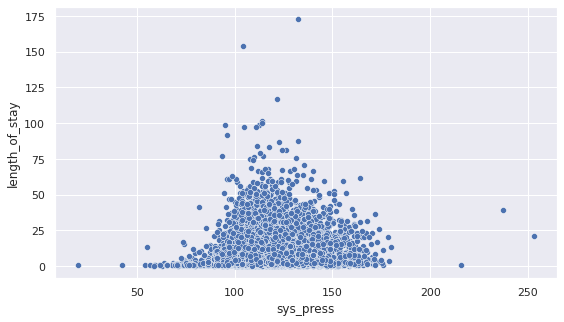

In [ ]:
sns.scatterplot(x='sys_press',y='length_of_stay',data=merged)

In [ ]:
# Systolic and Diastolic Blood Pressure values are missing for around 80 cases

In [ ]:
# Removed all cases with common missing values in sys_press and dias_press
merged = merged.dropna(subset=['sys_press','dias_press'])

In [ ]:
# Bicarbonate

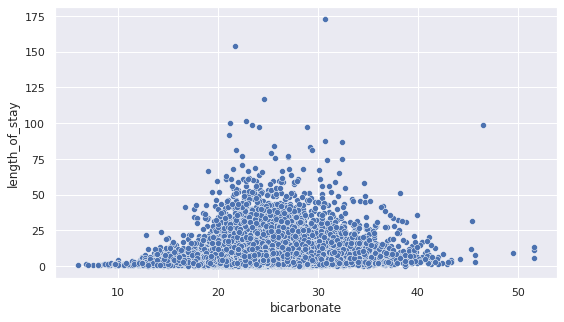

In [ ]:
# Carbon Dioxide level in the blood
# Normal bicarbonate level range is 23 to 30 units in adults.
sns.scatterplot(x='bicarbonate',y='length_of_stay',data=merged)

In [ ]:
mean_bicarbonate = round(merged.bicarbonate.mean(),6)
print(mean_bicarbonate)
merged.bicarbonate = merged.bicarbonate.fillna(mean_bicarbonate)

25.219502


In [ ]:
# Albumin

In [ ]:
# Albumin is a protein made by liver. Albumin helps keep fluid in bloodstream so it doesn't leak into other tissues.
# It is also carries various substances throughout the body including hormones, vitamins, and enzymes. 
# Low albumin levels can indicate a problem with your liver or kidneys.

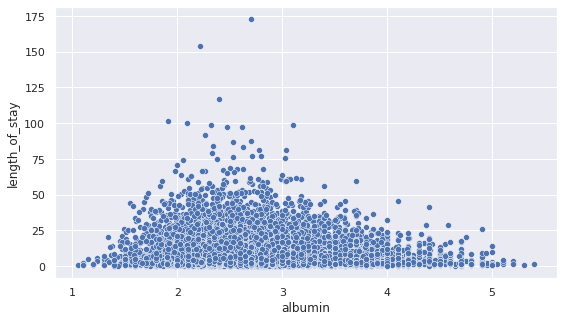

In [ ]:
# The normal range of albumin content in blood is 3.4 to 5.4 units
sns.scatterplot(x='albumin',y='length_of_stay',data=merged)

In [ ]:
mean_albumin = round(merged.albumin.mean(),2)
print(mean_albumin)
merged.albumin = merged.albumin.fillna(mean_albumin)

3.08


In [ ]:
# Creatinine 

In [ ]:
# Creatinine is a chemical compound left over from energy-producing processes in your muscles.

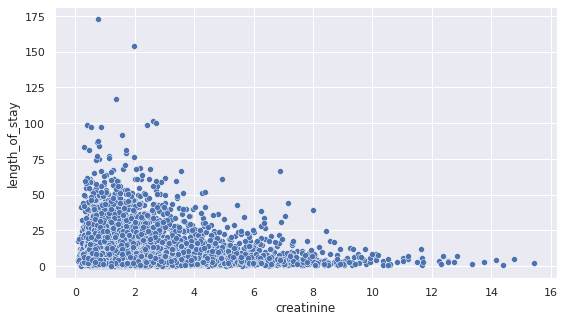

In [ ]:
# The normal range of creatinine for men is 0.74 to 1.35 units
# The normal range of creatinine for women is 0.59 to 1.04 units
sns.scatterplot(x='creatinine',y='length_of_stay',data=merged)

In [ ]:
# Sodium

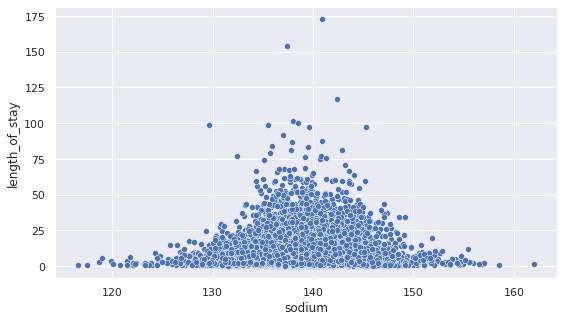

In [ ]:
# A normal blood sodium level is between 135 and 145 units
sns.scatterplot(x='sodium',y='length_of_stay',data=merged)

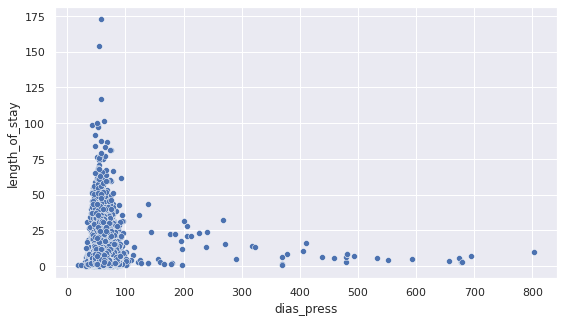

In [ ]:
sns.scatterplot(x='dias_press',y='length_of_stay',data=merged)

In [ ]:
# Diastolic Blood Pressure above 150 is generally not possible
merged.drop(merged.loc[merged['dias_press']>150].index,inplace=True)


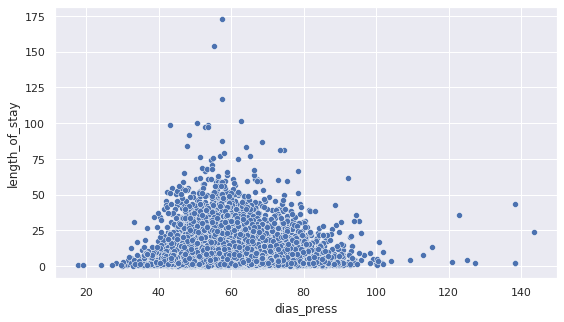

In [ ]:
sns.scatterplot(x='dias_press',y='length_of_stay',data=merged)

In [ ]:
# Platelet Count

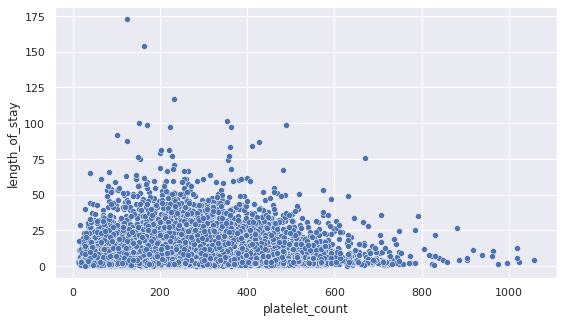

In [ ]:
# A normal platelet count ranges from 150 to 450 units
sns.scatterplot(x='platelet_count',y='length_of_stay',data=merged)

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18255 entries, 0 to 18408
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hematocrit            18255 non-null  float64
 1   dias_press            18255 non-null  float64
 2   creatinine            18255 non-null  float64
 3   platelet_count        18255 non-null  float64
 4   resp_rate             18255 non-null  float64
 5   total_mech_vent_time  18255 non-null  float64
 6   total_los_days        18255 non-null  float64
 7   procedure_count       18255 non-null  int64  
 8   blood_urea_nitrogen   18255 non-null  float64
 9   white_blood_cells     18255 non-null  float64
 10  hr                    18255 non-null  float64
 11  bicarbonate           18255 non-null  float64
 12  sys_press             18255 non-null  float64
 13  admissions_count      18255 non-null  int64  
 14  surgery_flag          18255 non-null  object 
 15  potassium          

In [ ]:
merged = merged.dropna()

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18231 entries, 0 to 18408
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hematocrit            18231 non-null  float64
 1   dias_press            18231 non-null  float64
 2   creatinine            18231 non-null  float64
 3   platelet_count        18231 non-null  float64
 4   resp_rate             18231 non-null  float64
 5   total_mech_vent_time  18231 non-null  float64
 6   total_los_days        18231 non-null  float64
 7   procedure_count       18231 non-null  int64  
 8   blood_urea_nitrogen   18231 non-null  float64
 9   white_blood_cells     18231 non-null  float64
 10  hr                    18231 non-null  float64
 11  bicarbonate           18231 non-null  float64
 12  sys_press             18231 non-null  float64
 13  admissions_count      18231 non-null  int64  
 14  surgery_flag          18231 non-null  object 
 15  potassium          

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18231 entries, 0 to 18408
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hematocrit            18231 non-null  float64
 1   dias_press            18231 non-null  float64
 2   creatinine            18231 non-null  float64
 3   platelet_count        18231 non-null  float64
 4   resp_rate             18231 non-null  float64
 5   total_mech_vent_time  18231 non-null  float64
 6   total_los_days        18231 non-null  float64
 7   procedure_count       18231 non-null  int64  
 8   blood_urea_nitrogen   18231 non-null  float64
 9   white_blood_cells     18231 non-null  float64
 10  hr                    18231 non-null  float64
 11  bicarbonate           18231 non-null  float64
 12  sys_press             18231 non-null  float64
 13  admissions_count      18231 non-null  int64  
 14  surgery_flag          18231 non-null  object 
 15  potassium          

In [ ]:
newmerged = merged.select_dtypes(np.number)
numeric_col = list(newmerged.drop(columns=['length_of_stay']).columns)

In [ ]:
numeric_col

['hematocrit',
 'dias_press',
 'creatinine',
 'platelet_count',
 'resp_rate',
 'total_mech_vent_time',
 'total_los_days',
 'procedure_count',
 'blood_urea_nitrogen',
 'white_blood_cells',
 'hr',
 'bicarbonate',
 'sys_press',
 'admissions_count',
 'potassium',
 'oasis_avg',
 'sofa_avg',
 'saps_avg',
 'sodium',
 'spo2',
 'blood_glucose',
 'albumin',
 'age']

**Data Normalisation**

In [ ]:
# normalised numerical columns
for column in numeric_col:
	merged[column] = (merged[column] - merged[column].min()) / (merged[column].max() - merged[column].min())	

In [ ]:
merged.head()

,hematocrit,dias_press,creatinine,platelet_count,resp_rate,total_mech_vent_time,total_los_days,procedure_count,blood_urea_nitrogen,white_blood_cells,hr,bicarbonate,sys_press,admissions_count,surgery_flag,potassium,oasis_avg,sofa_avg,saps_avg,sodium,spo2,icd9_group,blood_glucose,albumin,service,length_of_stay,age,gender,marital_status,religion,ethnicity
0,0.386163,0.512584,0.036672,0.207461,0.322854,0.000449,0.043673,0.025641,0.067886,0.066178,0.671089,0.512821,0.517686,0.0,NO SURGERY,0.288267,0.274194,0.000000,0.150,0.326169,0.960298,Diseases Of The Respiratory System,0.130089,0.218391,OMED,4.9776,0.434211,F,Single,None,Black
1,0.469256,0.266537,0.046100,0.125243,0.454789,0.001072,0.019449,0.076923,0.067553,0.084782,0.347576,0.421053,0.389385,0.0,NARROW,0.321789,0.403226,0.227273,0.325,0.465482,0.928971,Diseases Of The Circulatory System,0.223903,0.747126,CSURG,2.4908,0.592105,M,Married,Christian,White
2,0.298355,0.411846,0.048334,0.484033,0.393578,0.048478,0.051579,0.358974,0.044852,0.080929,0.562777,0.464638,0.529657,0.0,NARROW,0.289821,0.403226,0.090909,0.425,0.472586,0.983195,Injury And Poisoning,0.184624,0.321839,TRAUM,11.5029,0.078947,M,Single,None,Hispanic
3,0.317258,0.307678,0.050143,0.178574,0.208492,0.001559,0.037076,0.076923,0.049814,0.060849,0.441770,0.450780,0.411214,0.0,NARROW,0.310245,0.564516,0.181818,0.475,0.360150,0.964662,Diseases Of The Circulatory System,0.142337,0.643678,SURG,3.5763,0.684211,M,Married,Christian,White
4,0.362844,0.428465,0.067524,0.141897,0.231345,0.020159,0.023747,0.102564,0.175957,0.071621,0.493608,0.394737,0.403494,0.0,NARROW,0.330808,0.532258,0.227273,0.300,0.400239,0.979049,Diseases Of The Respiratory System,0.083913,0.126437,MED,6.1731,0.526316,M,Single,Christian,White


**Dummy Features**

In [ ]:
merged = pd.get_dummies(merged)

In [ ]:
merged.head()

,hematocrit,dias_press,creatinine,platelet_count,resp_rate,total_mech_vent_time,total_los_days,procedure_count,blood_urea_nitrogen,white_blood_cells,hr,bicarbonate,sys_press,admissions_count,potassium,oasis_avg,sofa_avg,saps_avg,sodium,spo2,blood_glucose,albumin,length_of_stay,age,surgery_flag_BROAD,surgery_flag_NARROW,surgery_flag_NO SURGERY,"icd9_group_Complications Of Pregnancy, Childbirth, And The Puerperium",icd9_group_Congenital Anomalies,icd9_group_Diseases Of The Blood And Blood-Forming Organs,icd9_group_Diseases Of The Circulatory System,icd9_group_Diseases Of The Digestive System,icd9_group_Diseases Of The Genitourinary System,icd9_group_Diseases Of The Musculoskeletal System And Connective Tissue,icd9_group_Diseases Of The Nervous System And Sense Organs,icd9_group_Diseases Of The Respiratory System,icd9_group_Diseases Of The Skin And Subcutaneous Tissue,"icd9_group_Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders",icd9_group_Infectious And Parasitic Diseases,icd9_group_Injury And Poisoning,icd9_group_Mental Disorders,icd9_group_Neoplasms,icd9_group_Supplementary Classification Of Factors Influencing Health Status,"icd9_group_Symptoms, Signs, And Ill-Defined Conditions",service_CMED,service_CSURG,service_ENT,service_GU,service_GYN,service_MED,service_NMED,service_NSURG,service_OBS,service_OMED,service_ORTHO,service_PSURG,service_SURG,service_TRAUM,service_TSURG,service_VSURG,gender_F,gender_M,marital_status_Divorced/separated,marital_status_Married,marital_status_Single,marital_status_Unknown,marital_status_Widowed,religion_Buddhist/hindu,religion_Christian,religion_Jewish/hebrew,religion_Muslim,religion_None,religion_Orthodox,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_None,ethnicity_Other,ethnicity_White
0,0.386163,0.512584,0.036672,0.207461,0.322854,0.000449,0.043673,0.025641,0.067886,0.066178,0.671089,0.512821,0.517686,0.0,0.288267,0.274194,0.000000,0.150,0.326169,0.960298,0.130089,0.218391,4.9776,0.434211,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0.469256,0.266537,0.046100,0.125243,0.454789,0.001072,0.019449,0.076923,0.067553,0.084782,0.347576,0.421053,0.389385,0.0,0.321789,0.403226,0.227273,0.325,0.465482,0.928971,0.223903,0.747126,2.4908,0.592105,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.298355,0.411846,0.048334,0.484033,0.393578,0.048478,0.051579,0.358974,0.044852,0.080929,0.562777,0.464638,0.529657,0.0,0.289821,0.403226,0.090909,0.425,0.472586,0.983195,0.184624,0.321839,11.5029,0.078947,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0.317258,0.307678,0.050143,0.178574,0.208492,0.001559,0.037076,0.076923,0.049814,0.060849,0.441770,0.450780,0.411214,0.0,0.310245,0.564516,0.181818,0.475,0.360150,0.964662,0.142337,0.643678,3.5763,0.684211,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.362844,0.428465,0.067524,0.141897,0.231345,0.020159,0.023747,0.102564,0.175957,0.071621,0.493608,0.394737,0.403494,0.0,0.330808,0.532258,0.227273,0.300,0.400239,0.979049,0.083913,0.126437,6.1731,0.526316,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
merged = merged.drop(columns=['gender_F','marital_status_Unknown','religion_None','ethnicity_None','surgery_flag_NO SURGERY'])

In [ ]:
# Future Tasks - 
#     1. Feature Selection
#     2. Subset Selecion

In [ ]:
# Final Dataset
merged.head(10)

,hematocrit,dias_press,creatinine,platelet_count,resp_rate,total_mech_vent_time,total_los_days,procedure_count,blood_urea_nitrogen,white_blood_cells,hr,bicarbonate,sys_press,admissions_count,potassium,oasis_avg,sofa_avg,saps_avg,sodium,spo2,blood_glucose,albumin,length_of_stay,age,surgery_flag_BROAD,surgery_flag_NARROW,"icd9_group_Complications Of Pregnancy, Childbirth, And The Puerperium",icd9_group_Congenital Anomalies,icd9_group_Diseases Of The Blood And Blood-Forming Organs,icd9_group_Diseases Of The Circulatory System,icd9_group_Diseases Of The Digestive System,icd9_group_Diseases Of The Genitourinary System,icd9_group_Diseases Of The Musculoskeletal System And Connective Tissue,icd9_group_Diseases Of The Nervous System And Sense Organs,icd9_group_Diseases Of The Respiratory System,icd9_group_Diseases Of The Skin And Subcutaneous Tissue,"icd9_group_Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders",icd9_group_Infectious And Parasitic Diseases,icd9_group_Injury And Poisoning,icd9_group_Mental Disorders,icd9_group_Neoplasms,icd9_group_Supplementary Classification Of Factors Influencing Health Status,"icd9_group_Symptoms, Signs, And Ill-Defined Conditions",service_CMED,service_CSURG,service_ENT,service_GU,service_GYN,service_MED,service_NMED,service_NSURG,service_OBS,service_OMED,service_ORTHO,service_PSURG,service_SURG,service_TRAUM,service_TSURG,service_VSURG,gender_M,marital_status_Divorced/separated,marital_status_Married,marital_status_Single,marital_status_Widowed,religion_Buddhist/hindu,religion_Christian,religion_Jewish/hebrew,religion_Muslim,religion_Orthodox,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White
0,0.386163,0.512584,0.036672,0.207461,0.322854,0.000449,0.043673,0.025641,0.067886,0.066178,0.671089,0.512821,0.517686,0.0,0.288267,0.274194,0.000000,0.150,0.326169,0.960298,0.130089,0.218391,4.9776,0.434211,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0.469256,0.266537,0.046100,0.125243,0.454789,0.001072,0.019449,0.076923,0.067553,0.084782,0.347576,0.421053,0.389385,0.0,0.321789,0.403226,0.227273,0.325,0.465482,0.928971,0.223903,0.747126,2.4908,0.592105,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,0.298355,0.411846,0.048334,0.484033,0.393578,0.048478,0.051579,0.358974,0.044852,0.080929,0.562777,0.464638,0.529657,0.0,0.289821,0.403226,0.090909,0.425,0.472586,0.983195,0.184624,0.321839,11.5029,0.078947,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.317258,0.307678,0.050143,0.178574,0.208492,0.001559,0.037076,0.076923,0.049814,0.060849,0.441770,0.450780,0.411214,0.0,0.310245,0.564516,0.181818,0.475,0.360150,0.964662,0.142337,0.643678,3.5763,0.684211,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0.362844,0.428465,0.067524,0.141897,0.231345,0.020159,0.023747,0.102564,0.175957,0.071621,0.493608,0.394737,0.403494,0.0,0.330808,0.532258,0.227273,0.300,0.400239,0.979049,0.083913,0.126437,6.1731,0.526316,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
5,0.581514,0.307001,0.047185,0.154318,0.253584,0.000902,0.005198,0.025641,0.037200,0.063407,0.396031,0.460526,0.509666,0.0,0.272727,0.419355,0.045455,0.225,0.581818,0.959489,0.074479,0.701149,0.6924,0.157895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
6,0.387969,0.266799,0.047185,0.141578,0.305448,0.003848,0.047471,0.128205,0.088077,0.075876,0.452832,0.493421,0.414601,0.0,0.360269,0.483871,0.090909,0.625,0.336045,0.968326,0.174718,0.459770,6.8557,0.868421,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
7,0.573124,0.471356,0.075605,0.192970,0.341011,0.039642,0.088552,0.076923,0.120165,0.123327,0.453387,0.514973,0.466586,0.0,0.245791,0.516129,0.

In [ ]:
def dfshape(X):
    print('Number of cases : ',X.shape[0])
    print('Number of features : ',X.shape[1])
dfshape(merged)

Number of cases :  18231
Number of features :  74


In [ ]:
merged[merged.length_of_stay == 3]

,hematocrit,dias_press,creatinine,platelet_count,resp_rate,total_mech_vent_time,total_los_days,procedure_count,blood_urea_nitrogen,white_blood_cells,hr,bicarbonate,sys_press,admissions_count,potassium,oasis_avg,sofa_avg,saps_avg,sodium,spo2,blood_glucose,albumin,length_of_stay,age,surgery_flag_BROAD,surgery_flag_NARROW,"icd9_group_Complications Of Pregnancy, Childbirth, And The Puerperium",icd9_group_Congenital Anomalies,icd9_group_Diseases Of The Blood And Blood-Forming Organs,icd9_group_Diseases Of The Circulatory System,icd9_group_Diseases Of The Digestive System,icd9_group_Diseases Of The Genitourinary System,icd9_group_Diseases Of The Musculoskeletal System And Connective Tissue,icd9_group_Diseases Of The Nervous System And Sense Organs,icd9_group_Diseases Of The Respiratory System,icd9_group_Diseases Of The Skin And Subcutaneous Tissue,"icd9_group_Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders",icd9_group_Infectious And Parasitic Diseases,icd9_group_Injury And Poisoning,icd9_group_Mental Disorders,icd9_group_Neoplasms,icd9_group_Supplementary Classification Of Factors Influencing Health Status,"icd9_group_Symptoms, Signs, And Ill-Defined Conditions",service_CMED,service_CSURG,service_ENT,service_GU,service_GYN,service_MED,service_NMED,service_NSURG,service_OBS,service_OMED,service_ORTHO,service_PSURG,service_SURG,service_TRAUM,service_TSURG,service_VSURG,gender_M,marital_status_Divorced/separated,marital_status_Married,marital_status_Single,marital_status_Widowed,religion_Buddhist/hindu,religion_Christian,religion_Jewish/hebrew,religion_Muslim,religion_Orthodox,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White
4228,0.304570,0.205898,0.059479,0.222257,0.248553,0.002545,0.032853,0.076923,0.075743,0.059666,0.442708,0.487939,0.357581,0.0,0.301010,0.645161,0.272727,0.55,0.506986,0.958223,0.167967,0.678161,3.0,0.828947,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
17326,0.480423,0.420947,0.048487,0.243183,0.233586,0.012494,0.011494,0.025641,0.037200,0.087791,0.249565,0.385965,0.494520,0.0,0.260606,0.403226,0.000000,0.35,0.462967,0.988184,0.193976,0.586207,3.0,0.539474,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
merged[merged.length_of_stay == 7] 

,hematocrit,dias_press,creatinine,platelet_count,resp_rate,total_mech_vent_time,total_los_days,procedure_count,blood_urea_nitrogen,white_blood_cells,hr,bicarbonate,sys_press,admissions_count,potassium,oasis_avg,sofa_avg,saps_avg,sodium,spo2,blood_glucose,albumin,length_of_stay,age,surgery_flag_BROAD,surgery_flag_NARROW,"icd9_group_Complications Of Pregnancy, Childbirth, And The Puerperium",icd9_group_Congenital Anomalies,icd9_group_Diseases Of The Blood And Blood-Forming Organs,icd9_group_Diseases Of The Circulatory System,icd9_group_Diseases Of The Digestive System,icd9_group_Diseases Of The Genitourinary System,icd9_group_Diseases Of The Musculoskeletal System And Connective Tissue,icd9_group_Diseases Of The Nervous System And Sense Organs,icd9_group_Diseases Of The Respiratory System,icd9_group_Diseases Of The Skin And Subcutaneous Tissue,"icd9_group_Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders",icd9_group_Infectious And Parasitic Diseases,icd9_group_Injury And Poisoning,icd9_group_Mental Disorders,icd9_group_Neoplasms,icd9_group_Supplementary Classification Of Factors Influencing Health Status,"icd9_group_Symptoms, Signs, And Ill-Defined Conditions",service_CMED,service_CSURG,service_ENT,service_GU,service_GYN,service_MED,service_NMED,service_NSURG,service_OBS,service_OMED,service_ORTHO,service_PSURG,service_SURG,service_TRAUM,service_TSURG,service_VSURG,gender_M,marital_status_Divorced/separated,marital_status_Married,marital_status_Single,marital_status_Widowed,religion_Buddhist/hindu,religion_Christian,religion_Jewish/hebrew,religion_Muslim,religion_Orthodox,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White


In [ ]:
def label(row):
   if row['length_of_stay'] < 3:
      return 1
   elif row['length_of_stay'] >= 3 and row['length_of_stay'] < 7:
      return 2
   else:
      return 3

In [ ]:
# Created labels for length_of_stay values
original = merged.copy(deep=True)
merged['length_of_stay'] = merged.apply(lambda row: label(row), axis=1)

In [ ]:
original.head()

,hematocrit,dias_press,creatinine,platelet_count,resp_rate,total_mech_vent_time,total_los_days,procedure_count,blood_urea_nitrogen,white_blood_cells,hr,bicarbonate,sys_press,admissions_count,potassium,oasis_avg,sofa_avg,saps_avg,sodium,spo2,blood_glucose,albumin,length_of_stay,age,surgery_flag_BROAD,surgery_flag_NARROW,"icd9_group_Complications Of Pregnancy, Childbirth, And The Puerperium",icd9_group_Congenital Anomalies,icd9_group_Diseases Of The Blood And Blood-Forming Organs,icd9_group_Diseases Of The Circulatory System,icd9_group_Diseases Of The Digestive System,icd9_group_Diseases Of The Genitourinary System,icd9_group_Diseases Of The Musculoskeletal System And Connective Tissue,icd9_group_Diseases Of The Nervous System And Sense Organs,icd9_group_Diseases Of The Respiratory System,icd9_group_Diseases Of The Skin And Subcutaneous Tissue,"icd9_group_Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders",icd9_group_Infectious And Parasitic Diseases,icd9_group_Injury And Poisoning,icd9_group_Mental Disorders,icd9_group_Neoplasms,icd9_group_Supplementary Classification Of Factors Influencing Health Status,"icd9_group_Symptoms, Signs, And Ill-Defined Conditions",service_CMED,service_CSURG,service_ENT,service_GU,service_GYN,service_MED,service_NMED,service_NSURG,service_OBS,service_OMED,service_ORTHO,service_PSURG,service_SURG,service_TRAUM,service_TSURG,service_VSURG,gender_M,marital_status_Divorced/separated,marital_status_Married,marital_status_Single,marital_status_Widowed,religion_Buddhist/hindu,religion_Christian,religion_Jewish/hebrew,religion_Muslim,religion_Orthodox,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White
0,0.386163,0.512584,0.036672,0.207461,0.322854,0.000449,0.043673,0.025641,0.067886,0.066178,0.671089,0.512821,0.517686,0.0,0.288267,0.274194,0.000000,0.150,0.326169,0.960298,0.130089,0.218391,4.9776,0.434211,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0.469256,0.266537,0.046100,0.125243,0.454789,0.001072,0.019449,0.076923,0.067553,0.084782,0.347576,0.421053,0.389385,0.0,0.321789,0.403226,0.227273,0.325,0.465482,0.928971,0.223903,0.747126,2.4908,0.592105,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,0.298355,0.411846,0.048334,0.484033,0.393578,0.048478,0.051579,0.358974,0.044852,0.080929,0.562777,0.464638,0.529657,0.0,0.289821,0.403226,0.090909,0.425,0.472586,0.983195,0.184624,0.321839,11.5029,0.078947,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.317258,0.307678,0.050143,0.178574,0.208492,0.001559,0.037076,0.076923,0.049814,0.060849,0.441770,0.450780,0.411214,0.0,0.310245,0.564516,0.181818,0.475,0.360150,0.964662,0.142337,0.643678,3.5763,0.684211,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0.362844,0.428465,0.067524,0.141897,0.231345,0.020159,0.023747,0.102564,0.175957,0.071621,0.493608,0.394737,0.403494,0.0,0.330808,0.532258,0.227273,0.300,0.400239,0.979049,0.083913,0.126437,6.1731,0.526316,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
merged.head()

,hematocrit,dias_press,creatinine,platelet_count,resp_rate,total_mech_vent_time,total_los_days,procedure_count,blood_urea_nitrogen,white_blood_cells,hr,bicarbonate,sys_press,admissions_count,potassium,oasis_avg,sofa_avg,saps_avg,sodium,spo2,blood_glucose,albumin,length_of_stay,age,surgery_flag_BROAD,surgery_flag_NARROW,"icd9_group_Complications Of Pregnancy, Childbirth, And The Puerperium",icd9_group_Congenital Anomalies,icd9_group_Diseases Of The Blood And Blood-Forming Organs,icd9_group_Diseases Of The Circulatory System,icd9_group_Diseases Of The Digestive System,icd9_group_Diseases Of The Genitourinary System,icd9_group_Diseases Of The Musculoskeletal System And Connective Tissue,icd9_group_Diseases Of The Nervous System And Sense Organs,icd9_group_Diseases Of The Respiratory System,icd9_group_Diseases Of The Skin And Subcutaneous Tissue,"icd9_group_Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders",icd9_group_Infectious And Parasitic Diseases,icd9_group_Injury And Poisoning,icd9_group_Mental Disorders,icd9_group_Neoplasms,icd9_group_Supplementary Classification Of Factors Influencing Health Status,"icd9_group_Symptoms, Signs, And Ill-Defined Conditions",service_CMED,service_CSURG,service_ENT,service_GU,service_GYN,service_MED,service_NMED,service_NSURG,service_OBS,service_OMED,service_ORTHO,service_PSURG,service_SURG,service_TRAUM,service_TSURG,service_VSURG,gender_M,marital_status_Divorced/separated,marital_status_Married,marital_status_Single,marital_status_Widowed,religion_Buddhist/hindu,religion_Christian,religion_Jewish/hebrew,religion_Muslim,religion_Orthodox,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White
0,0.386163,0.512584,0.036672,0.207461,0.322854,0.000449,0.043673,0.025641,0.067886,0.066178,0.671089,0.512821,0.517686,0.0,0.288267,0.274194,0.000000,0.150,0.326169,0.960298,0.130089,0.218391,2,0.434211,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0.469256,0.266537,0.046100,0.125243,0.454789,0.001072,0.019449,0.076923,0.067553,0.084782,0.347576,0.421053,0.389385,0.0,0.321789,0.403226,0.227273,0.325,0.465482,0.928971,0.223903,0.747126,1,0.592105,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,0.298355,0.411846,0.048334,0.484033,0.393578,0.048478,0.051579,0.358974,0.044852,0.080929,0.562777,0.464638,0.529657,0.0,0.289821,0.403226,0.090909,0.425,0.472586,0.983195,0.184624,0.321839,3,0.078947,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.317258,0.307678,0.050143,0.178574,0.208492,0.001559,0.037076,0.076923,0.049814,0.060849,0.441770,0.450780,0.411214,0.0,0.310245,0.564516,0.181818,0.475,0.360150,0.964662,0.142337,0.643678,2,0.684211,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0.362844,0.428465,0.067524,0.141897,0.231345,0.020159,0.023747,0.102564,0.175957,0.071621,0.493608,0.394737,0.403494,0.0,0.330808,0.532258,0.227273,0.300,0.400239,0.979049,0.083913,0.126437,2,0.526316,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1


### **Mortality Dataset**

In [ ]:
mortality.head()

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,WHITE,0.16,2.59,0.00,na,1.30,25.12,43.44,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,2
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,WHITE,0.25,2.23,0.99,Endosc control gast hem,1.98,13.61,55.94,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,2
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,0.00,0.75,0.17,Non-invasive mech vent,0.83,11.46,33.39,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,4
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,WHITE,0.41,0.69,0.27,Part sm bowel resect NEC,0.69,20.30,32.24,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,2
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,WHITE,0.00,3.69,0.82,Aortocor bypas-3 cor art,2.25,20.49,50.61,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,2


In [ ]:
print('Dataset shape')
dfshape(mortality)

Dataset shape
Number of cases :  58976
Number of features :  28


In [ ]:
print('List of columns')
mortality.columns

List of columns


Index(['hadm_id', 'gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [ ]:
mortality = mortality.drop(columns = ['hadm_id'])

In [ ]:
numeric_cols = list(mortality.select_dtypes(np.number).columns)
print('Nominal data columns')
numeric_cols

Nominal data columns


['age',
 'LOSdays',
 'NumCallouts',
 'NumDiagnosis',
 'NumProcs',
 'NumCPTevents',
 'NumInput',
 'NumLabs',
 'NumMicroLabs',
 'NumNotes',
 'NumOutput',
 'NumRx',
 'NumProcEvents',
 'NumTransfers',
 'NumChartEvents',
 'ExpiredHospital',
 'TotalNumInteract',
 'LOSgroupNum']

In [ ]:
print('number of nominal columns:',len(numeric_cols))

number of nominal columns: 18


In [ ]:
print('Categorical data columns')
category_cols = list(set(mortality.columns) - set(numeric_cols))
category_cols

Categorical data columns


['AdmitProcedure',
 'gender',
 'admit_type',
 'ethnicity',
 'admit_location',
 'marital_status',
 'religion',
 'insurance',
 'AdmitDiagnosis']

In [ ]:
print('number of categorical columns:',len(category_cols))

number of categorical columns: 9


In [ ]:
# missing values in AdmitDiagnosis [less], religion [less], marital_status [high]
mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            58976 non-null  object 
 1   age               58976 non-null  int64  
 2   LOSdays           58976 non-null  float64
 3   admit_type        58976 non-null  object 
 4   admit_location    58976 non-null  object 
 5   AdmitDiagnosis    58951 non-null  object 
 6   insurance         58976 non-null  object 
 7   religion          58518 non-null  object 
 8   marital_status    48848 non-null  object 
 9   ethnicity         58976 non-null  object 
 10  NumCallouts       58976 non-null  float64
 11  NumDiagnosis      58976 non-null  float64
 12  NumProcs          58976 non-null  float64
 13  AdmitProcedure    58976 non-null  object 
 14  NumCPTevents      58976 non-null  float64
 15  NumInput          58976 non-null  float64
 16  NumLabs           58976 non-null  float6

In [ ]:
# missing value imputated in AdmitDiagnosis and religion with most frequent values using SimpleImputer package
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(mortality[['AdmitDiagnosis','religion']])
mortality[['AdmitDiagnosis','religion']] = imputer.transform(mortality[['AdmitDiagnosis','religion']])

In [ ]:
# dropped columns with Nan values
mortality = mortality.dropna()

In [ ]:
mortality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48848 entries, 0 to 58975
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            48848 non-null  object 
 1   age               48848 non-null  int64  
 2   LOSdays           48848 non-null  float64
 3   admit_type        48848 non-null  object 
 4   admit_location    48848 non-null  object 
 5   AdmitDiagnosis    48848 non-null  object 
 6   insurance         48848 non-null  object 
 7   religion          48848 non-null  object 
 8   marital_status    48848 non-null  object 
 9   ethnicity         48848 non-null  object 
 10  NumCallouts       48848 non-null  float64
 11  NumDiagnosis      48848 non-null  float64
 12  NumProcs          48848 non-null  float64
 13  AdmitProcedure    48848 non-null  object 
 14  NumCPTevents      48848 non-null  float64
 15  NumInput          48848 non-null  float64
 16  NumLabs           48848 non-null  float6

In [ ]:
# linear relationships between ExpiredHostpital and features
mortality.corr().ExpiredHospital

age                 0.109544
LOSdays             0.019629
NumCallouts        -0.138532
NumDiagnosis        0.198044
NumProcs            0.154998
NumCPTevents        0.206276
NumInput            0.343980
NumLabs             0.308553
NumMicroLabs        0.182386
NumNotes            0.103879
NumOutput           0.252096
NumRx               0.273657
NumProcEvents       0.191329
NumTransfers        0.127431
NumChartEvents      0.306743
ExpiredHospital     1.000000
TotalNumInteract    0.333221
LOSgroupNum        -0.028819
Name: ExpiredHospital, dtype: float64

In [ ]:
# normalised numerical columns before oversampling [preferred]
for column in numeric_cols[1:-1]:
	mortality[column] = (mortality[column] - mortality[column].min()) / (mortality[column].max() - mortality[column].min())	

In [ ]:
mortality.head()

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,F,35,0.020942,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,WHITE,0.033613,0.005756,0.00000,na,0.005778,0.003681,0.008394,0.001733,0.000009,0.013840,0.019880,0.0113,0.00520,0.008083,0.0,0.007200,2
1,M,59,0.013712,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,WHITE,0.052521,0.004956,0.00396,Endosc control gast hem,0.008800,0.001994,0.010810,0.003307,0.000283,0.014533,0.009573,0.0099,0.00992,0.007562,0.0,0.006789,2
2,F,48,0.040865,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,0.000000,0.001667,0.00068,Non-invasive mech vent,0.003689,0.001679,0.006452,0.000880,0.000027,0.011067,0.008307,0.0000,0.00264,0.005803,0.0,0.005015,4
3,F,73,0.024743,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,WHITE,0.086134,0.001533,0.00108,Part sm bowel resect NEC,0.003067,0.002974,0.006230,0.001840,0.000030,0.024133,0.015360,0.0000,0.00768,0.010665,0.0,0.008791,2
4,M,60,0.016563,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,WHITE,0.000000,0.008200,0.00328,Aortocor bypas-3 cor art,0.010000,0.003002,0.009780,0.001627,0.000060,0.043173,0.033333,0.0287,0.01640,0.011250,0.0,0.009910,2


In [ ]:
dic = {}
for column in mortality.columns:
    if column in category_cols:
        temp = len(mortality[column].unique())
        dic[column] = temp
dic

{'AdmitDiagnosis': 15085,
 'AdmitProcedure': 1244,
 'admit_location': 9,
 'admit_type': 4,
 'ethnicity': 41,
 'gender': 2,
 'insurance': 5,
 'marital_status': 7,
 'religion': 20}

In [ ]:
lis = list(dic.keys())
lis.remove('AdmitDiagnosis')
lis.remove('AdmitProcedure')
lis

['gender',
 'admit_type',
 'admit_location',
 'insurance',
 'religion',
 'marital_status',
 'ethnicity']

In [ ]:
mortality = pd.get_dummies(mortality, columns=lis, drop_first=True)
mortality.head()

,age,LOSdays,AdmitDiagnosis,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum,gender_M,admit_type_EMERGENCY,admit_type_NEWBORN,admit_type_URGENT,admit_location_CLINIC REFERRAL/PREMATURE,admit_location_EMERGENCY ROOM ADMIT,admit_location_HMO REFERRAL/SICK,admit_location_PHYS REFERRAL/NORMAL DELI,admit_location_TRANSFER FROM HOSP/EXTRAM,admit_location_TRANSFER FROM OTHER HEALT,admit_location_TRANSFER FROM SKILLED NUR,admit_location_TRSF WITHIN THIS FACILITY,insurance_Medicaid,insurance_Medicare,insurance_Private,insurance_Self Pay,religion_BAPTIST,religion_BUDDHIST,religion_CATHOLIC,religion_CHRISTIAN SCIENTIST,religion_EPISCOPALIAN,religion_GREEK ORTHODOX,religion_HEBREW,religion_HINDU,religion_JEHOVAH'S WITNESS,religion_JEWISH,religion_LUTHERAN,religion_METHODIST,religion_MUSLIM,religion_NOT SPECIFIED,religion_OTHER,religion_PROTESTANT QUAKER,religion_ROMANIAN EAST. ORTH,religion_UNITARIAN-UNIVERSALIST,religion_UNOBTAINABLE,marital_status_LIFE PARTNER,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_UNKNOWN (DEFAULT),marital_status_WIDOWED,ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,ethnicity_ASIAN,ethnicity_ASIAN - ASIAN INDIAN,ethnicity_ASIAN - CAMBODIAN,ethnicity_ASIAN - CHINESE,ethnicity_ASIAN - FILIPINO,ethnicity_ASIAN - JAPANESE,ethnicity_ASIAN - KOREAN,ethnicity_ASIAN - OTHER,ethnicity_ASIAN - THAI,ethnicity_ASIAN - VIETNAMESE,ethnicity_BLACK/AFRICAN,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_BLACK/CAPE VERDEAN,ethnicity_BLACK/HAITIAN,ethnicity_CARIBBEAN ISLAND,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),ethnicity_HISPANIC/LATINO - COLOMBIAN,ethnicity_HISPANIC/LATINO - CUBAN,ethnicity_HISPANIC/LATINO - DOMINICAN,ethnicity_HISPANIC/LATINO - GUATEMALAN,ethnicity_HISPANIC/LATINO - HONDURAN,ethnicity_HISPANIC/LATINO - MEXICAN,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_HISPANIC/LATINO - SALVADORAN,ethnicity_MIDDLE EASTERN,ethnicity_MULTI RACE ETHNICITY,ethnicity_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_SOUTH AMERICAN,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN
0,35,0.020942,DIABETIC KETOACIDOSIS,0.033613,0.005756,0.00000,na,0.005778,0.003681,0.008394,0.001733,0.000009,0.013840,0.019880,0.0113,0.00520,0.008083,0.0,0.007200,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,59,0.013712,UPPER GI BLEED,0.052521,0.004956,0.00396,Endosc control gast hem,0.008800,0.001994,0.010810,0.003307,0.000283,0.014533,0.009573,0.0099,0.00992,0.007562,0.0,0.006789,2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,48,0.040865,COPD FLARE,0.000000,0.001667,0.00068,Non-invasive mech vent,0.003689,0.001679,0.006452,0.000880,0.000027,0.011067,0.008307,0.0000,0.00264,0.005803,0.0,0.005015,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,73,0.024743,BOWEL OBSTRUCTION,0.086134,0.001533,0.00108,Part sm bowel resect NEC,0.003067,0.002974,0.006230,0.001840,0.000030,0.024133,0.015360,0.0000,0.00768,0.010665,0.0,0.008791,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,0.016563,CORONARY ARTERY DISEASE,0.000000,0.008200,0.00328,Aortocor bypas-3 cor art,0.010000,0.003002,0.009780,0.001627,0.000060,0.043173,0.0333

In [ ]:
dfshape(mortality)

Number of cases :  48848
Number of features :  101


In [ ]:
print('Number of expired cases:',mortality[mortality.ExpiredHospital == 0.00].shape[0])
print('Number of alive cases:',mortality[mortality.ExpiredHospital == 1.00].shape[0])
print('There is a class imbalance in the dataset')

Number of expired cases: 43655
Number of alive cases: 5193
There is a class imbalance in the dataset


In [ ]:
# over sampling for mortality dataset
X = mortality.drop(columns = ['ExpiredHospital'])
y = mortality.ExpiredHospital
X.head(3)

,age,LOSdays,AdmitDiagnosis,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract,LOSgroupNum,gender_M,admit_type_EMERGENCY,admit_type_NEWBORN,admit_type_URGENT,admit_location_CLINIC REFERRAL/PREMATURE,admit_location_EMERGENCY ROOM ADMIT,admit_location_HMO REFERRAL/SICK,admit_location_PHYS REFERRAL/NORMAL DELI,admit_location_TRANSFER FROM HOSP/EXTRAM,admit_location_TRANSFER FROM OTHER HEALT,admit_location_TRANSFER FROM SKILLED NUR,admit_location_TRSF WITHIN THIS FACILITY,insurance_Medicaid,insurance_Medicare,insurance_Private,insurance_Self Pay,religion_BAPTIST,religion_BUDDHIST,religion_CATHOLIC,religion_CHRISTIAN SCIENTIST,religion_EPISCOPALIAN,religion_GREEK ORTHODOX,religion_HEBREW,religion_HINDU,religion_JEHOVAH'S WITNESS,religion_JEWISH,religion_LUTHERAN,religion_METHODIST,religion_MUSLIM,religion_NOT SPECIFIED,religion_OTHER,religion_PROTESTANT QUAKER,religion_ROMANIAN EAST. ORTH,religion_UNITARIAN-UNIVERSALIST,religion_UNOBTAINABLE,marital_status_LIFE PARTNER,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_UNKNOWN (DEFAULT),marital_status_WIDOWED,ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,ethnicity_ASIAN,ethnicity_ASIAN - ASIAN INDIAN,ethnicity_ASIAN - CAMBODIAN,ethnicity_ASIAN - CHINESE,ethnicity_ASIAN - FILIPINO,ethnicity_ASIAN - JAPANESE,ethnicity_ASIAN - KOREAN,ethnicity_ASIAN - OTHER,ethnicity_ASIAN - THAI,ethnicity_ASIAN - VIETNAMESE,ethnicity_BLACK/AFRICAN,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_BLACK/CAPE VERDEAN,ethnicity_BLACK/HAITIAN,ethnicity_CARIBBEAN ISLAND,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),ethnicity_HISPANIC/LATINO - COLOMBIAN,ethnicity_HISPANIC/LATINO - CUBAN,ethnicity_HISPANIC/LATINO - DOMINICAN,ethnicity_HISPANIC/LATINO - GUATEMALAN,ethnicity_HISPANIC/LATINO - HONDURAN,ethnicity_HISPANIC/LATINO - MEXICAN,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_HISPANIC/LATINO - SALVADORAN,ethnicity_MIDDLE EASTERN,ethnicity_MULTI RACE ETHNICITY,ethnicity_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_SOUTH AMERICAN,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN
0,35,0.020942,DIABETIC KETOACIDOSIS,0.033613,0.005756,0.00000,na,0.005778,0.003681,0.008394,0.001733,0.000009,0.013840,0.019880,0.0113,0.00520,0.008083,0.007200,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,59,0.013712,UPPER GI BLEED,0.052521,0.004956,0.00396,Endosc control gast hem,0.008800,0.001994,0.010810,0.003307,0.000283,0.014533,0.009573,0.0099,0.00992,0.007562,0.006789,2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,48,0.040865,COPD FLARE,0.000000,0.001667,0.00068,Non-invasive mech vent,0.003689,0.001679,0.006452,0.000880,0.000027,0.011067,0.008307,0.0000,0.00264,0.005803,0.005015,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
ros = RandomOverSampler(random_state=0)
X_sam, y_sam = ros.fit_resample(X,y)

In [ ]:
print('number of samples before oversampling -',y.shape[0])
print('number of samples after oversampling -',y_sam.shape[0])

number of samples before oversampling - 48848
number of samples after oversampling - 87310


In [ ]:
X_sam.head()

,age,LOSdays,AdmitDiagnosis,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract,LOSgroupNum,gender_M,admit_type_EMERGENCY,admit_type_NEWBORN,admit_type_URGENT,admit_location_CLINIC REFERRAL/PREMATURE,admit_location_EMERGENCY ROOM ADMIT,admit_location_HMO REFERRAL/SICK,admit_location_PHYS REFERRAL/NORMAL DELI,admit_location_TRANSFER FROM HOSP/EXTRAM,admit_location_TRANSFER FROM OTHER HEALT,admit_location_TRANSFER FROM SKILLED NUR,admit_location_TRSF WITHIN THIS FACILITY,insurance_Medicaid,insurance_Medicare,insurance_Private,insurance_Self Pay,religion_BAPTIST,religion_BUDDHIST,religion_CATHOLIC,religion_CHRISTIAN SCIENTIST,religion_EPISCOPALIAN,religion_GREEK ORTHODOX,religion_HEBREW,religion_HINDU,religion_JEHOVAH'S WITNESS,religion_JEWISH,religion_LUTHERAN,religion_METHODIST,religion_MUSLIM,religion_NOT SPECIFIED,religion_OTHER,religion_PROTESTANT QUAKER,religion_ROMANIAN EAST. ORTH,religion_UNITARIAN-UNIVERSALIST,religion_UNOBTAINABLE,marital_status_LIFE PARTNER,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_UNKNOWN (DEFAULT),marital_status_WIDOWED,ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,ethnicity_ASIAN,ethnicity_ASIAN - ASIAN INDIAN,ethnicity_ASIAN - CAMBODIAN,ethnicity_ASIAN - CHINESE,ethnicity_ASIAN - FILIPINO,ethnicity_ASIAN - JAPANESE,ethnicity_ASIAN - KOREAN,ethnicity_ASIAN - OTHER,ethnicity_ASIAN - THAI,ethnicity_ASIAN - VIETNAMESE,ethnicity_BLACK/AFRICAN,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_BLACK/CAPE VERDEAN,ethnicity_BLACK/HAITIAN,ethnicity_CARIBBEAN ISLAND,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),ethnicity_HISPANIC/LATINO - COLOMBIAN,ethnicity_HISPANIC/LATINO - CUBAN,ethnicity_HISPANIC/LATINO - DOMINICAN,ethnicity_HISPANIC/LATINO - GUATEMALAN,ethnicity_HISPANIC/LATINO - HONDURAN,ethnicity_HISPANIC/LATINO - MEXICAN,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_HISPANIC/LATINO - SALVADORAN,ethnicity_MIDDLE EASTERN,ethnicity_MULTI RACE ETHNICITY,ethnicity_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_SOUTH AMERICAN,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN
0,35,0.020942,DIABETIC KETOACIDOSIS,0.033613,0.005756,0.00000,na,0.005778,0.003681,0.008394,0.001733,0.000009,0.013840,0.019880,0.0113,0.00520,0.008083,0.007200,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,59,0.013712,UPPER GI BLEED,0.052521,0.004956,0.00396,Endosc control gast hem,0.008800,0.001994,0.010810,0.003307,0.000283,0.014533,0.009573,0.0099,0.00992,0.007562,0.006789,2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,48,0.040865,COPD FLARE,0.000000,0.001667,0.00068,Non-invasive mech vent,0.003689,0.001679,0.006452,0.000880,0.000027,0.011067,0.008307,0.0000,0.00264,0.005803,0.005015,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,73,0.024743,BOWEL OBSTRUCTION,0.086134,0.001533,0.00108,Part sm bowel resect NEC,0.003067,0.002974,0.006230,0.001840,0.000030,0.024133,0.015360,0.0000,0.00768,0.010665,0.008791,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,0.016563,CORONARY ARTERY DISEASE,0.000000,0.008200,0.00328,Aortocor bypas-3 cor art,0.010000,0.003002,0.009780,0.001627,0.000060,0.043173,0.033333,0.0287,0.01640,0.011250,0.009

**Train-Test Split**

In [ ]:
print('Train-Test split of mortality data')
Xm = X_sam
ym = y_sam
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.1)

Train-Test split of mortality data


In [ ]:
print('Training set',Xm_train.shape,ym_train.shape,'Test set',Xm_test.shape,ym_test.shape,sep='\n')

Training set
(78579, 100)
(78579,)
Test set
(8731, 100)
(8731,)


In [ ]:
print('Train-Test split of LOS data')
X = merged[merged.columns.difference(['length_of_stay'])]
y = merged['length_of_stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Train-Test split of LOS data


In [ ]:
print('Training set',X_train.shape,y_train.shape,'Test set',X_test.shape,y_test.shape,sep='\n')

Training set
(16407, 73)
(16407,)
Test set
(1824, 73)
(1824,)


In [ ]:
# over sampling for merged data 
oversample = SMOTE(random_state = 1)
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(X_train.shape)

(18651, 73)


In [ ]:
X_train.head()

,admissions_count,age,albumin,bicarbonate,blood_glucose,blood_urea_nitrogen,creatinine,dias_press,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,gender_M,hematocrit,hr,"icd9_group_Complications Of Pregnancy, Childbirth, And The Puerperium",icd9_group_Congenital Anomalies,icd9_group_Diseases Of The Blood And Blood-Forming Organs,icd9_group_Diseases Of The Circulatory System,icd9_group_Diseases Of The Digestive System,icd9_group_Diseases Of The Genitourinary System,icd9_group_Diseases Of The Musculoskeletal System And Connective Tissue,icd9_group_Diseases Of The Nervous System And Sense Organs,icd9_group_Diseases Of The Respiratory System,icd9_group_Diseases Of The Skin And Subcutaneous Tissue,"icd9_group_Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders",icd9_group_Infectious And Parasitic Diseases,icd9_group_Injury And Poisoning,icd9_group_Mental Disorders,icd9_group_Neoplasms,icd9_group_Supplementary Classification Of Factors Influencing Health Status,"icd9_group_Symptoms, Signs, And Ill-Defined Conditions",marital_status_Divorced/separated,marital_status_Married,marital_status_Single,marital_status_Widowed,oasis_avg,platelet_count,potassium,procedure_count,religion_Buddhist/hindu,religion_Christian,religion_Jewish/hebrew,religion_Muslim,religion_Orthodox,resp_rate,saps_avg,service_CMED,service_CSURG,service_ENT,service_GU,service_GYN,service_MED,service_NMED,service_NSURG,service_OBS,service_OMED,service_ORTHO,service_PSURG,service_SURG,service_TRAUM,service_TSURG,service_VSURG,sodium,sofa_avg,spo2,surgery_flag_BROAD,surgery_flag_NARROW,sys_press,total_los_days,total_mech_vent_time,white_blood_cells
0,0.000000,0.802632,0.455939,0.661269,0.265373,0.143936,0.078225,0.291073,0,0,0,0,0,0,0.360590,0.602038,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.451613,0.293508,0.221848,0.128205,0,0,0,0,0,0.316781,0.5000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.647847,0.045455,0.973040,0,0,0.442305,0.052232,0.074886,0.155473
1,0.066667,0.605263,0.356322,0.413925,0.167949,0.066649,0.056405,0.345421,0,0,0,0,1,1,0.316267,0.458364,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.298387,0.474509,0.304473,0.307692,0,1,0,0,0,0.398644,0.3125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.473401,0.090909,0.942949,0,1,0.409934,0.074661,0.009492,0.070397
2,0.000000,0.828947,0.678161,0.374269,0.167735,0.171892,0.114302,0.414174,0,0,0,0,1,1,0.397237,0.420375,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.459677,0.215234,0.286195,0.230769,0,1,0,0,0,0.353175,0.4125,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.528017,0.363636,0.921289,0,1,0.483062,0.050848,0.004017,0.086916
3,0.000000,1.000000,0.379310,0.361842,0.406902,0.152831,0.074845,0.367340,0,0,0,0,1,0,0.335095,0.520967,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.483871,0.120006,0.338384,0.102564,0,0,1,0,0,0.207120,0.4000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.605662,0.227273,0.934913,0,1,0.418513,0.034938,0.004131,0.067374
4,0.000000,0.697368,0.310345,0.534539,0.172075,0.146124,0.079727,0.274372,0,0,0,0,1,1,0.307404,0.485395,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.354839,0.257075,0.303434,0.333333,0,1,0,0,0,0.341723,0.3625,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.589155,0.272727,0.915651,0,1,0.420273,0.088596,0.081327,0.077501


In [ ]:
Xm_train.head()

,age,LOSdays,AdmitDiagnosis,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract,LOSgroupNum,gender_M,admit_type_EMERGENCY,admit_type_NEWBORN,admit_type_URGENT,admit_location_CLINIC REFERRAL/PREMATURE,admit_location_EMERGENCY ROOM ADMIT,admit_location_HMO REFERRAL/SICK,admit_location_PHYS REFERRAL/NORMAL DELI,admit_location_TRANSFER FROM HOSP/EXTRAM,admit_location_TRANSFER FROM OTHER HEALT,admit_location_TRANSFER FROM SKILLED NUR,admit_location_TRSF WITHIN THIS FACILITY,insurance_Medicaid,insurance_Medicare,insurance_Private,insurance_Self Pay,religion_BAPTIST,religion_BUDDHIST,religion_CATHOLIC,religion_CHRISTIAN SCIENTIST,religion_EPISCOPALIAN,religion_GREEK ORTHODOX,religion_HEBREW,religion_HINDU,religion_JEHOVAH'S WITNESS,religion_JEWISH,religion_LUTHERAN,religion_METHODIST,religion_MUSLIM,religion_NOT SPECIFIED,religion_OTHER,religion_PROTESTANT QUAKER,religion_ROMANIAN EAST. ORTH,religion_UNITARIAN-UNIVERSALIST,religion_UNOBTAINABLE,marital_status_LIFE PARTNER,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_UNKNOWN (DEFAULT),marital_status_WIDOWED,ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,ethnicity_ASIAN,ethnicity_ASIAN - ASIAN INDIAN,ethnicity_ASIAN - CAMBODIAN,ethnicity_ASIAN - CHINESE,ethnicity_ASIAN - FILIPINO,ethnicity_ASIAN - JAPANESE,ethnicity_ASIAN - KOREAN,ethnicity_ASIAN - OTHER,ethnicity_ASIAN - THAI,ethnicity_ASIAN - VIETNAMESE,ethnicity_BLACK/AFRICAN,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_BLACK/CAPE VERDEAN,ethnicity_BLACK/HAITIAN,ethnicity_CARIBBEAN ISLAND,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),ethnicity_HISPANIC/LATINO - COLOMBIAN,ethnicity_HISPANIC/LATINO - CUBAN,ethnicity_HISPANIC/LATINO - DOMINICAN,ethnicity_HISPANIC/LATINO - GUATEMALAN,ethnicity_HISPANIC/LATINO - HONDURAN,ethnicity_HISPANIC/LATINO - MEXICAN,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_HISPANIC/LATINO - SALVADORAN,ethnicity_MIDDLE EASTERN,ethnicity_MULTI RACE ETHNICITY,ethnicity_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_SOUTH AMERICAN,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN
75573,53,0.020942,OVERDOSE,0.00000,0.003244,0.00324,Cont inv mec ven <96 hrs,0.006489,0.009404,0.013654,0.002160,0.000094,0.039760,0.022693,0.0,0.00648,0.014951,0.013267,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
45667,66,0.019380,BRAIN TUMOR,0.00000,0.003111,0.00072,Other brain excision,0.000000,0.000051,0.004703,0.000000,0.000021,0.004213,0.009347,0.0,0.00984,0.003891,0.003326,2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
84596,83,0.065336,PNEUMOTHORAX-FRACTURED RIBS,0.00000,0.000933,0.00144,Temporary tracheostomy,0.004400,0.023010,0.012087,0.004987,0.000044,0.054453,0.000000,0.0,0.00080,0.027957,0.023658,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
27084,74,0.027424,NEUTROPENIA,0.02521,0.004956,0.00048,Non-invasive mech vent,0.006044,0.000888,0.009565,0.001653,0.000032,0.006267,0.015347,0.0,0.00400,0.002700,0.003028,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
33631,72,0.019516,CHEST PAIN;RULE-OUT MYOCARDIAL INFARCTION,0.00000,0.002311,0.00416,1 int mam-cor art bypass,0.001556,0.005147,0.009208,0.000453,0.000037,0.024587,0.014

### **Classification**

In [ ]:
estimators = [
     ('KN', KNeighborsClassifier()),
     ('AT', ExtraTreesClassifier(random_state=0))
]

classifiers = [RandomForestClassifier(),
               XGBClassifier(), 
               KNeighborsClassifier(),  
               LogisticRegression(),
               ExtraTreesClassifier(random_state=0),
               StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=10, random_state=42))
               ]
classifiers_m = [RandomForestClassifier(),
                XGBClassifier(), 
                KNeighborsClassifier(), 
                LogisticRegression(),
                ExtraTreesClassifier(random_state=0),
                StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=10, random_state=42))
               ]

In [ ]:
# length of stay prediction
clf_list = []
acc_list = []
auc_los = []
for item in classifiers:
    print(str(item).split('(')[0])
    print()
    clf = item
    clf_list.append(str(item).split('(')[0])
    # model training
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # accuracy 
    score =  accuracy_score(y_test, y_pred)
    acc_list.append(round(score,2))
    # classification report for summary of the classification metrices like precision, recall and f1-score
    target_names = ['1', '2', '3']
    print(classification_report(y_test, y_pred, target_names=target_names))
    # AUC area under the curve is the measure of the ability of a classifier to distinguish between classes
    auc_los.append(roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr'))
    print()

RandomForestClassifier

              precision    recall  f1-score   support

           1       0.70      0.77      0.73       693
           2       0.64      0.62      0.63       543
           3       0.80      0.73      0.76       588

    accuracy                           0.71      1824
   macro avg       0.71      0.71      0.71      1824
weighted avg       0.72      0.71      0.71      1824


XGBClassifier

              precision    recall  f1-score   support

           1       0.74      0.75      0.75       693
           2       0.63      0.60      0.62       543
           3       0.81      0.84      0.82       588

    accuracy                           0.73      1824
   macro avg       0.73      0.73      0.73      1824
weighted avg       0.73      0.73      0.73      1824


KNeighborsClassifier

              precision    recall  f1-score   support

           1       0.53      0.52      0.53       693
           2       0.37      0.44      0.40       543
           3

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           1       0.63      0.65      0.64       693
           2       0.45      0.42      0.44       543
           3       0.75      0.75      0.75       588

    accuracy                           0.62      1824
   macro avg       0.61      0.61      0.61      1824
weighted avg       0.61      0.62      0.61      1824


ExtraTreesClassifier

              precision    recall  f1-score   support

           1       0.68      0.75      0.71       693
           2       0.60      0.53      0.56       543
           3       0.76      0.75      0.76       588

    accuracy                           0.68      1824
   macro avg       0.68      0.68      0.68      1824
weighted avg       0.68      0.68      0.68      1824


StackingClassifier

              precision    recall  f1-score   support

           1       0.66      0.74      0.70       693
           2       0.57      0.47      0.51       543
           3       0.74      0.

RandomForestClassifier



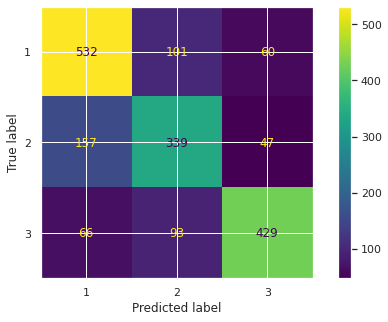


XGBClassifier



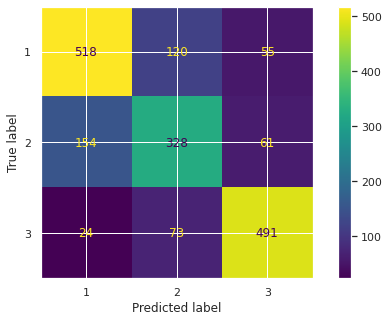


KNeighborsClassifier



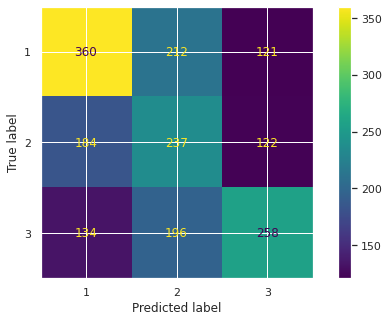


LogisticRegression



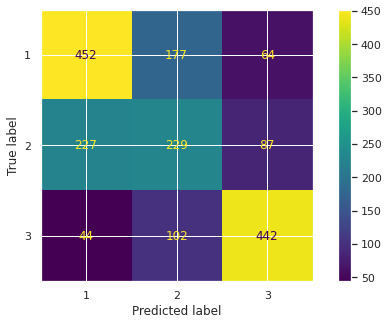


ExtraTreesClassifier



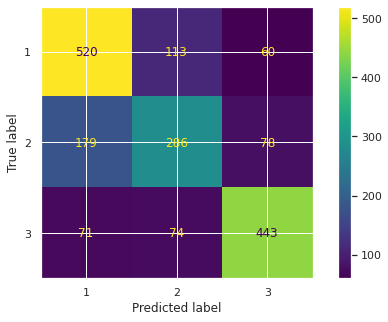


StackingClassifier



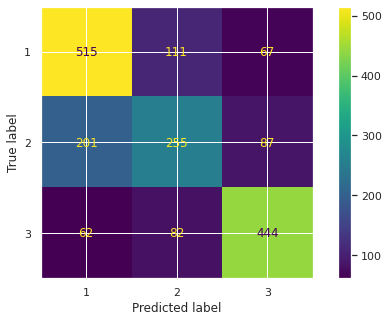

In [ ]:
for item in classifiers:
    print(str(item).split('(')[0])
    print()
    clf = item
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
    plt.show()
    print()

In [ ]:
for i in range(len(clf_list)):
    temp = str(clf_list[i]).split('(')[0]
    clf_list[i] = temp

In [ ]:
acc_dict = {'Classifier Name': clf_list, 'Accuracy(%)': acc_list}
acc_dict = pd.DataFrame(acc_dict, index = [0,1,2,3,4,5])
acc_dict

,Classifier Name,Accuracy(%)
0,RandomForestClassifier,0.71
1,XGBClassifier,0.73
2,KNeighborsClassifier,0.47
3,LogisticRegression,0.62
4,ExtraTreesClassifier,0.68
5,StackingClassifier,0.67


In [ ]:
auc_dict = {'Classifier Name': clf_list, 'AUC': auc_los}
auc_dict = pd.DataFrame(auc_dict, index = [0,1,2,3,4,5])
auc_dict

,Classifier Name,AUC
0,RandomForestClassifier,0.996029
1,XGBClassifier,0.905060
2,KNeighborsClassifier,0.860808
3,LogisticRegression,0.804586
4,ExtraTreesClassifier,0.996170
5,StackingClassifier,0.847810


In [ ]:
# Mortality prediction
clf_list_m = []
acc_list_m = []
auc_mor = []
for item in classifiers_m:
    print(str(item).split('(')[0])
    print()
    clf_m = item
    clf_list_m.append(str(item).split('(')[0])
    # model training
    clf_m.fit(Xm_train, ym_train)
    ym_pred = clf_m.predict(Xm_test)
    # accuracy
    score_m =  accuracy_score(ym_test, ym_pred)
    mortality_list.append(round(score_m,2))   
    # classification report
    print(classification_report(ym_test, predicted_m, target_names=['0', '1']))
    # AUC
    auc_mortality.append(roc_auc_score(ym_train, clf_m.predict_proba(Xm_train)[:,1]))

RandomForestClassifier



ValueError: ignored

In [ ]:
auc_mortality

[1.0, 0.9747029656156441, 0.8322897817364717, 1.0, 1.0]

In [ ]:
mortality_list

[95.36, 95.36, 85.12, 75.85, 94.55, 95.19]

In [ ]:
acc_list

[92.52, 78.28, 82.13, 68.04, 91.45, 93.39]

In [ ]:
cl_list = [
          'Random Forest Classifier',
          'XGBoost Classifier', 
          'K Neighbors Classifier', 
          'Logistic Regression',
          'Extra Trees Classifier',
          'Stacking'
          ]

cl_list_m = [
          'Random Forest Classifier',
          'K Neighbors Classifier', 
          'Logistic Regression',
          'Extra Trees Classifier',
          'Stacking'
          ]

In [ ]:
auc = pd.DataFrame(list(zip(cl_list,auc_los)),columns =['Classifier', 'AUC'])
auc_m = pd.DataFrame(list(zip(cl_list_m,auc_mortality)),columns =['Classifier', 'AUC-M'])

In [ ]:
score = pd.DataFrame(list(zip(cl_list,acc_list)),columns =['Classifier', 'Accuracy'])
score_m = pd.DataFrame(list(zip(cl_list_m,mortality_list)),columns =['Classifier', 'Accuracy-Mortality'])

In [ ]:
score

,Classifier,Accuracy
0,Random Forest Classifier,92.52
1,XGBoost Classifier,78.28
2,K Neighbors Classifier,82.13
3,Logistic Regression,68.04
4,Extra Trees Classifier,91.45
5,Stacking,93.39


In [ ]:
score_m

,Classifier,Accuracy-Mortality
0,Random Forest Classifier,95.36
1,K Neighbors Classifier,95.36
2,Logistic Regression,85.12
3,Extra Trees Classifier,75.85
4,Stacking,94.55


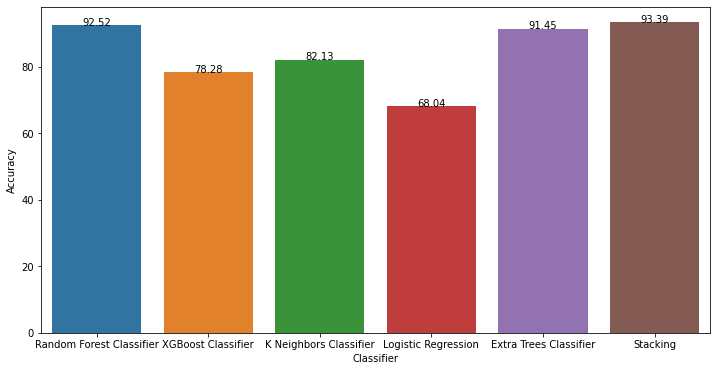

In [ ]:
plt.figure(figsize=(12,6))
score_ = sns.barplot(x='Classifier',y='Accuracy',data=score)

for index,row in score.iterrows():
    score_.text(row.name,row.Accuracy, round(row.Accuracy,2), color='black', ha="center")

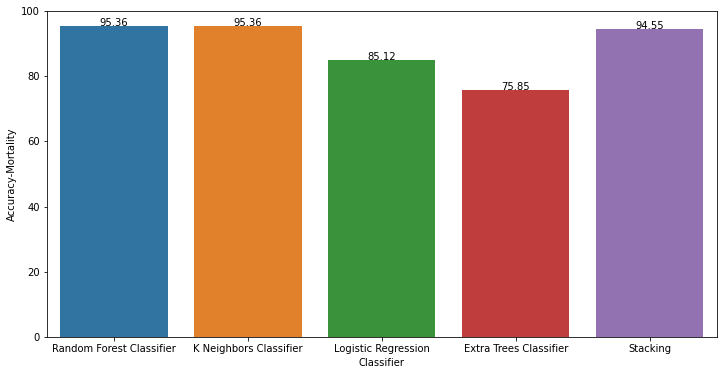

In [ ]:
plt.figure(figsize=(12,6))
score_m_ = sns.barplot(x='Classifier',y='Accuracy-Mortality',data=score_m)

for index,row in score_m.iterrows():
    score_m_.text(row.name,row['Accuracy-Mortality'], round(row['Accuracy-Mortality'],2), color='black', ha="center")

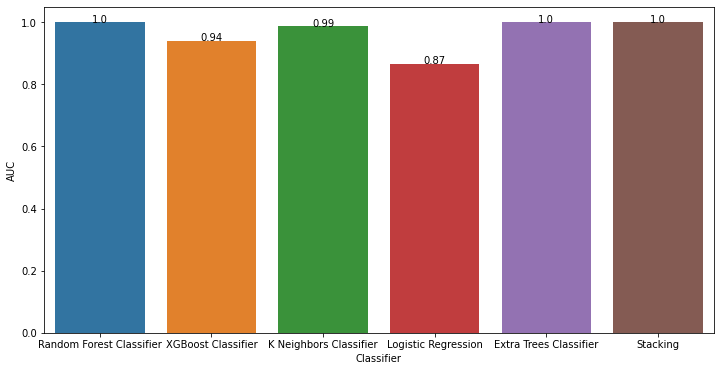

In [ ]:
plt.figure(figsize=(12,6))
auc_ = sns.barplot(x='Classifier',y='AUC',data=auc)

for index,row in auc.iterrows():
    auc_.text(row.name,row['AUC'], round(row['AUC'],2), color='black', ha="center")

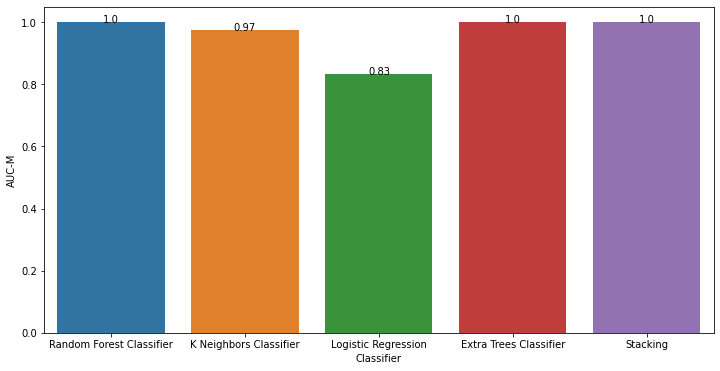

In [ ]:
plt.figure(figsize=(12,6))
auc_m_ = sns.barplot(x='Classifier',y='AUC-M',data=auc_m)

for index,row in auc_m.iterrows():
    auc_m_.text(row.name,row['AUC-M'], round(row['AUC-M'],2), color='black', ha="center")